In [260]:
!pip install catboost

In [261]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [264]:
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

**Load The Dataset**

In [265]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [266]:
train_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [267]:
train_data.shape

(22083, 45)

In [268]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [269]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood cell count (mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother's age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father's age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test 1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test 5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No. of previous abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [270]:
train_data.isnull().sum()

,0
Patient Id,0
Patient Age,1427
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Blood cell count (mcL),0
Patient First Name,0
Family Name,9691
Father's name,0


## **Handle Missing Value**

In [271]:
def impute_numeric_with_kde(df, column_name, valid_range=None):
    """
    Impute missing values in a numeric column using KDE per Genetic Disorder.

    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to impute
    - valid_range: Tuple of (min, max) to clip imputed values (optional)

    Returns:
    - DataFrame with imputed values
    """
    # Get non-missing values per Genetic Disorder
    dist_0 = df.loc[(df['Genetic Disorder'] == 0) & df[column_name].notna(), column_name].values
    dist_1 = df.loc[(df['Genetic Disorder'] == 1) & df[column_name].notna(), column_name].values
    dist_2 = df.loc[(df['Genetic Disorder'] == 2) & df[column_name].notna(), column_name].values
    overall_dist = df.loc[df[column_name].notna(), column_name].values

    # Masks for missing values
    mask_0 = (df['Genetic Disorder'] == 0) & df[column_name].isna()
    mask_1 = (df['Genetic Disorder'] == 1) & df[column_name].isna()
    mask_2 = (df['Genetic Disorder'] == 2) & df[column_name].isna()

    np.random.seed(42)  # For reproducibility

    # Impute using KDE
    if len(dist_0) > 0:
        kde_0 = gaussian_kde(dist_0)
        samples_0 = kde_0.resample(mask_0.sum())[0]
        samples_0 = np.round(samples_0)  # Round to integers
        if valid_range:
            samples_0 = np.clip(samples_0, valid_range[0], valid_range[1])  # Clip to valid range
        df.loc[mask_0, column_name] = samples_0
    else:
        samples_0 = np.random.choice(overall_dist, size=mask_0.sum(), replace=True)
        if valid_range:
            samples_0 = np.clip(samples_0, valid_range[0], valid_range[1])
        df.loc[mask_0, column_name] = samples_0

    if len(dist_1) > 0:
        kde_1 = gaussian_kde(dist_1)
        samples_1 = kde_1.resample(mask_1.sum())[0]
        samples_1 = np.round(samples_1)
        if valid_range:
            samples_1 = np.clip(samples_1, valid_range[0], valid_range[1])
        df.loc[mask_1, column_name] = samples_1
    else:
        samples_1 = np.random.choice(overall_dist, size=mask_1.sum(), replace=True)
        if valid_range:
            samples_1 = np.clip(samples_1, valid_range[0], valid_range[1])
        df.loc[mask_1, column_name] = samples_1

    if len(dist_2) > 0:
        kde_2 = gaussian_kde(dist_2)
        samples_2 = kde_2.resample(mask_2.sum())[0]
        samples_2 = np.round(samples_2)
        if valid_range:
            samples_2 = np.clip(samples_2, valid_range[0], valid_range[1])
        df.loc[mask_2, column_name] = samples_2
    else:
        samples_2 = np.random.choice(overall_dist, size=mask_2.sum(), replace=True)
        if valid_range:
            samples_2 = np.clip(samples_2, valid_range[0], valid_range[1])
        df.loc[mask_2, column_name] = samples_2

    return df

In [272]:
def impute_categorical_with_proportions_improved(df, column_name):
    overall_data = df.loc[df[column_name].notna(), column_name]
    overall_proportions = overall_data.value_counts(normalize=True)
    overall_categories = overall_proportions.index
    overall_proportions = overall_proportions.values

    for disorder in [0, 1, 2]:
        mask_non_missing = (df['Genetic Disorder'] == disorder) & df[column_name].notna()
        mask_missing = (df['Genetic Disorder'] == disorder) & df[column_name].isna()

        if mask_missing.sum() == 0:
            continue

        if mask_non_missing.sum() > 0:
            group_data = df.loc[mask_non_missing, column_name]
            group_proportions = group_data.value_counts(normalize=True)
            for cat in overall_categories:
                if cat not in group_proportions.index:
                    group_proportions[cat] = 0
            group_proportions = group_proportions[overall_categories]
            categories = group_proportions.index
            proportions = group_proportions.values
        else:
            categories = overall_categories
            proportions = overall_proportions

        np.random.seed(42)
        imputed_values = np.random.choice(categories, size=mask_missing.sum(), p=proportions, replace=True)
        df.loc[mask_missing, column_name] = imputed_values

    return df

**Patient Id**

In [273]:
train_data["Patient Id"]

,Patient Id
0,PID0x6418
1,PID0x25d5
2,PID0x4a82
3,PID0x4ac8
4,PID0x1bf7
...,...
22078,PID0x5598
22079,PID0x19cb
22080,PID0x3c4f
22081,PID0x13a


Every patient have different "Patient Id". We will drop this column.

In [274]:
train_data = train_data.drop(columns=["Patient Id"])

In [275]:
train_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


**Patient First Name**

In [276]:
train_data["Patient First Name"]

,Patient First Name
0,Richard
1,Mike
2,Kimberly
3,Jeffery
4,Johanna
...,...
22078,Lynn
22079,Matthew
22080,John
22081,Sharon


In [277]:
train_data["Patient First Name"].value_counts()

,count
Patient First Name,
James,420
John,372
Robert,355
Mary,329
Michael,321
...,...
Sharice,1
Shasta,1
Maryalice,1


Lot's of different value.

In [278]:
train_data = train_data.drop(columns="Patient First Name")

**Family Name**

In [279]:
train_data["Family Name"]

,Family Name
0,NaN
1,NaN
2,NaN
3,Hoelscher
4,Stutzman
...,...
22078,NaN
22079,Farley
22080,NaN
22081,NaN


Family Name column have also lot;s of unique value

In [280]:
train_data = train_data.drop(columns="Family Name")

**Father's name**

In [281]:
train_data["Father's name"]

,Father's name
0,Larre
1,Brycen
2,Nashon
3,Aayaan
4,Suave
...,...
22078,Alhassane
22079,Dartanion
22080,Cavani
22081,Bomer


In [282]:
train_data = train_data.drop(columns="Father's name")

In [283]:
train_data = train_data.drop(columns=["Institute Name","Location of Institute","Disorder Subclass"])

**Mother's age**

In [284]:
train_data["Mother's age"]

,Mother's age
0,NaN
1,NaN
2,41.0
3,21.0
4,32.0
...,...
22078,35.0
22079,NaN
22080,35.0
22081,19.0


In [285]:
train_data["Mother's age"].isnull().sum()

6036

In [286]:
train_data = train_data.drop(columns="Mother's age")

**Father's age**

In [287]:
train_data["Father's age"]

,Father's age
0,NaN
1,23.0
2,22.0
3,NaN
4,NaN
...,...
22078,64.0
22079,56.0
22080,51.0
22081,NaN


In [288]:
train_data["Father's age"].isnull().sum()

5986

In [289]:
train_data = train_data.drop(columns="Father's age")

In [290]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Status                                            22083 non-null  object 
 7   Respiratory Rate (breaths/min)                    19934 non-null  object 
 8   Heart Rate (rates/min                             19970 non-null  object 
 9   Test 1           

In [291]:
train_data.isnull().sum()

,0
Patient Age,1427
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Blood cell count (mcL),0
Status,0
Respiratory Rate (breaths/min),2149
Heart Rate (rates/min,2113
Test 1,2127


**Genectic Disorder**

In [292]:
train_data["Genetic Disorder"]

,Genetic Disorder
0,Mitochondrial genetic inheritance disorders
1,NaN
2,Multifactorial genetic inheritance disorders
3,Mitochondrial genetic inheritance disorders
4,Multifactorial genetic inheritance disorders
...,...
22078,Mitochondrial genetic inheritance disorders
22079,Multifactorial genetic inheritance disorders
22080,Mitochondrial genetic inheritance disorders
22081,NaN


**Patients age**

In [293]:
train_data["Genetic Disorder"].value_counts()

,count
Genetic Disorder,
Mitochondrial genetic inheritance disorders,10202
Single-gene inheritance diseases,7664
Multifactorial genetic inheritance disorders,2071


<ipython-input-294-3803d7bee52f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genetic Disorder', data=train_data, palette="bright")


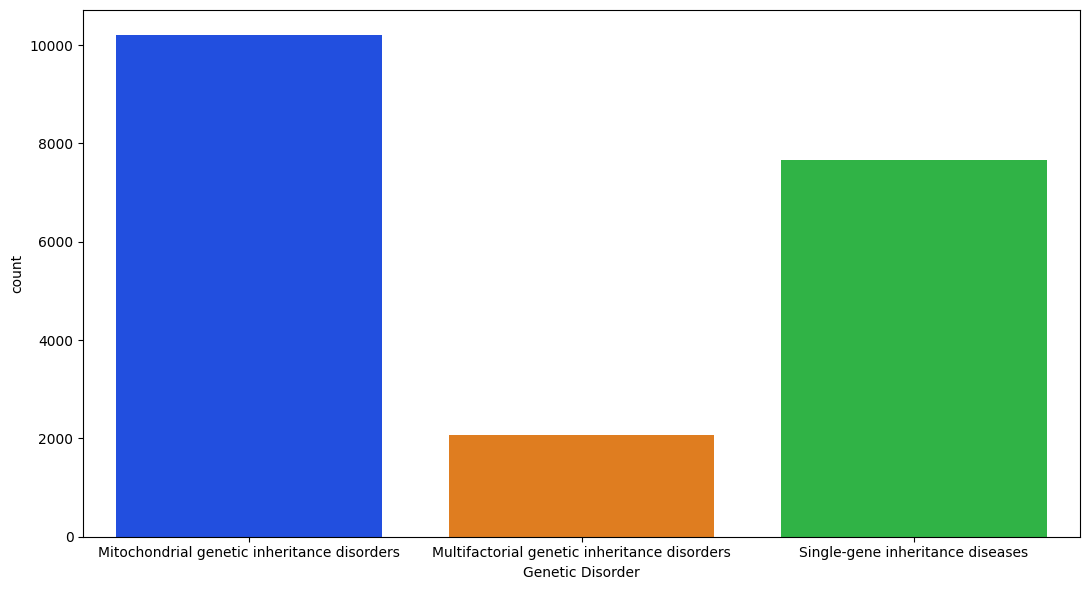

In [294]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Genetic Disorder', data=train_data, palette="bright")
plt.tight_layout()

In [295]:
train_data["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In target column have some missing value. we will drop these rows

In [296]:
train_data = train_data.dropna(subset=["Genetic Disorder"])

In [297]:
train_data["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [298]:
label_encoder = LabelEncoder()

In [299]:
train_data["Genetic Disorder"] = label_encoder.fit_transform(train_data["Genetic Disorder"])

<ipython-input-299-f62c9fa7dbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Genetic Disorder"] = label_encoder.fit_transform(train_data["Genetic Disorder"])


In [300]:
train_data["Genetic Disorder"].value_counts()

,count
Genetic Disorder,
0,10202
2,7664
1,2071


In [301]:
train_data.isnull().sum()

,0
Patient Age,1225
Genes in mother's side,0
Inherited from father,261
Maternal gene,2424
Paternal gene,0
Blood cell count (mcL),0
Status,0
Respiratory Rate (breaths/min),1826
Heart Rate (rates/min,1805
Test 1,1818


In [302]:
train_data.shape

(19937, 36)

**Patient Age**

<Axes: xlabel='Patient Age', ylabel='Genetic Disorder'>

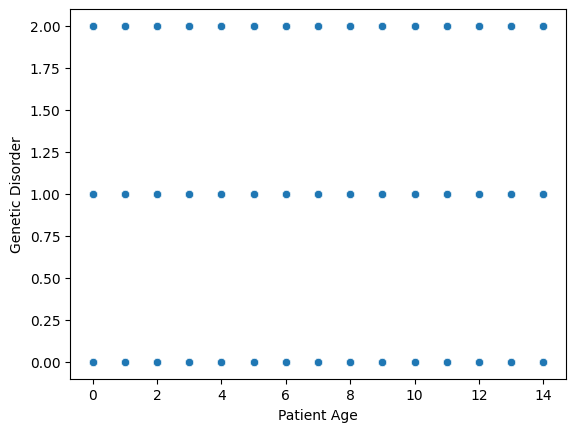

In [303]:
sns.scatterplot(x="Patient Age", y="Genetic Disorder", data=train_data)

In [304]:
train_data["Patient Age"].isnull().sum()

1225

<ipython-input-305-6b14272a927f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient Age', data=train_data, palette="bright")


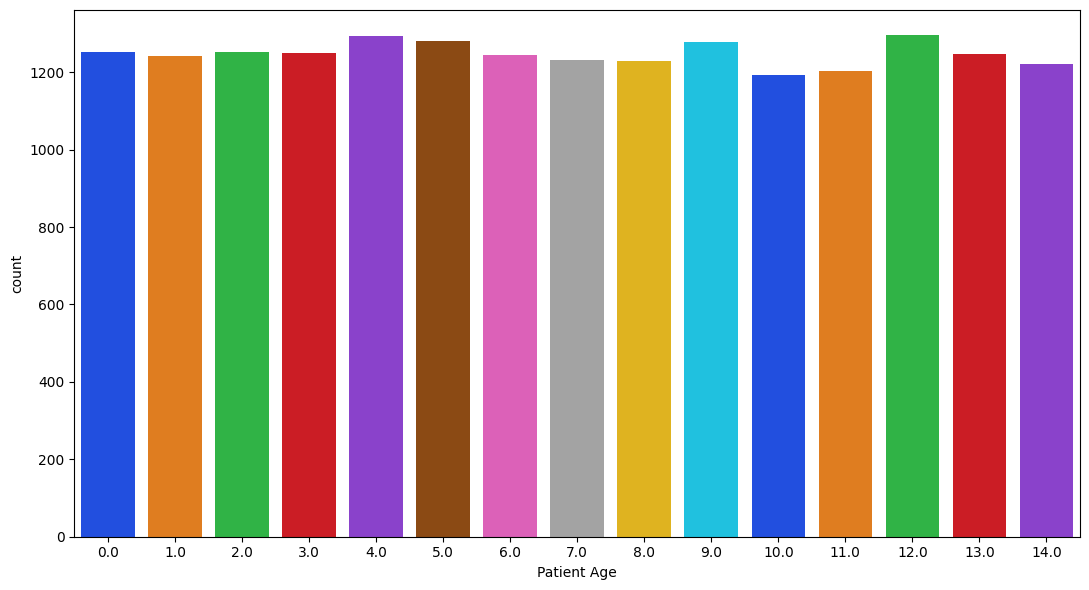

In [305]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Patient Age', data=train_data, palette="bright")
plt.tight_layout()

In [306]:
# Handle missing value
train_data = impute_numeric_with_kde(train_data, 'Patient Age', valid_range=(0, 14))

In [307]:
train_data["Patient Age"].isnull().sum()

0

<ipython-input-308-6b14272a927f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient Age', data=train_data, palette="bright")


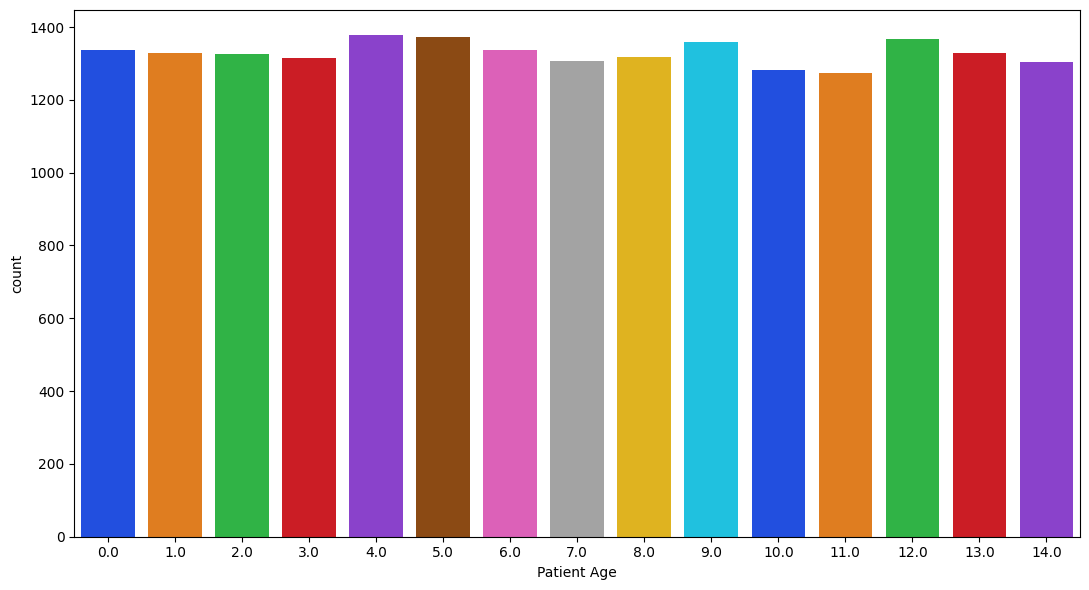

In [308]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Patient Age', data=train_data, palette="bright")
plt.tight_layout()

**Genes in mother's side**

In [309]:
train_data["Genes in mother's side"]

,Genes in mother's side
0,Yes
2,Yes
3,Yes
4,Yes
5,Yes
...,...
22077,No
22078,Yes
22079,No
22080,Yes


In [310]:
train_data["Genes in mother's side"].value_counts()

,count
Genes in mother's side,
Yes,11848
No,8089


<ipython-input-311-b8f3c69929aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Genes in mother's side", data=train_data, palette="bright")


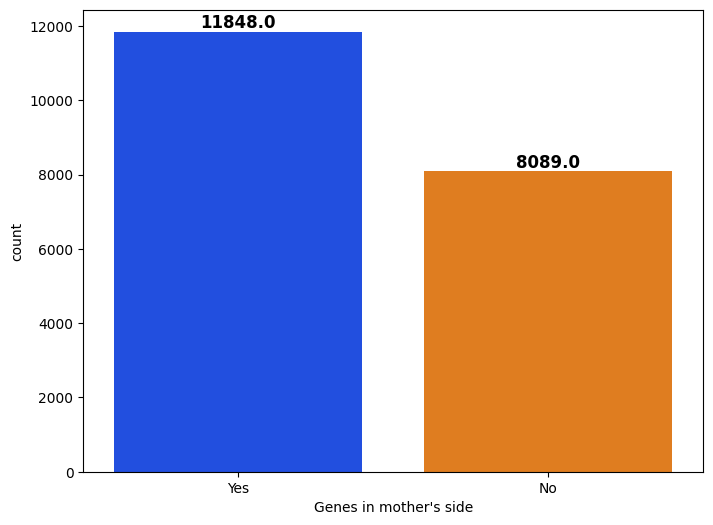

In [311]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Genes in mother's side", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

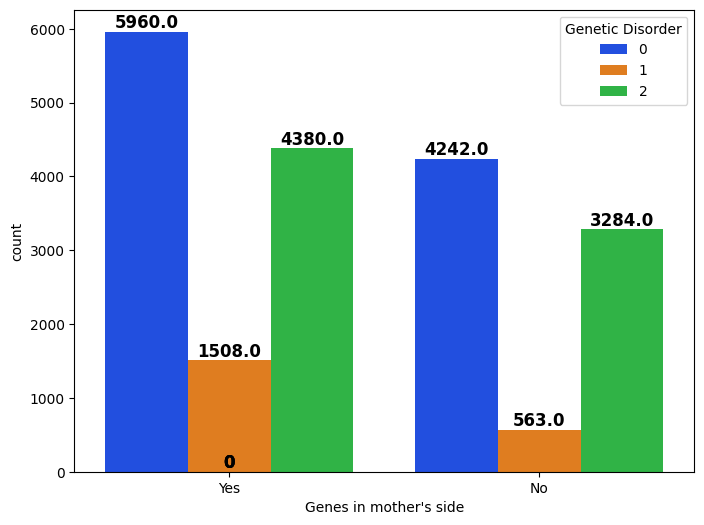

In [312]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Genes in mother's side", data=train_data, hue="Genetic Disorder", palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [313]:
train_data["Genes in mother's side"].isnull().sum()

0

In [314]:
train_data["Genes in mother's side"].unique()

array(['Yes', 'No'], dtype=object)

**Inherited from father**

In [315]:
train_data["Inherited from father"]

,Inherited from father
0,No
2,No
3,No
4,No
5,No
...,...
22077,Yes
22078,Yes
22079,Yes
22080,No


In [316]:
train_data["Inherited from father"].value_counts()

,count
Inherited from father,
No,11873
Yes,7803


<ipython-input-317-41340c1325dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Inherited from father", data=train_data, palette="bright")


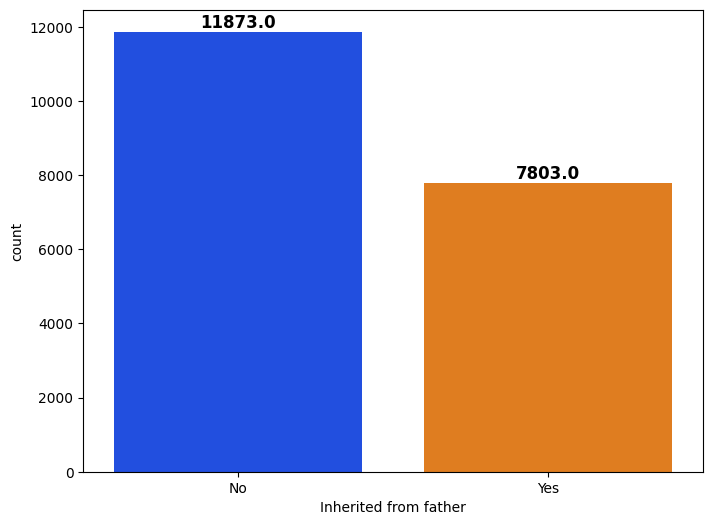

In [317]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Inherited from father", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

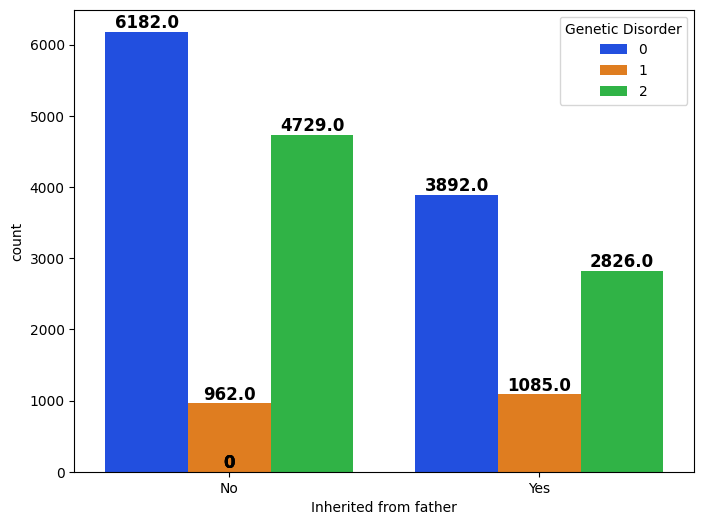

In [318]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Inherited from father", hue="Genetic Disorder", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [319]:
train_data["Inherited from father"].isnull().sum()

261

In [320]:
train_data["Inherited from father"].unique()

array(['No', 'Yes', nan], dtype=object)

In [321]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Inherited from father')

In [322]:
train_data["Inherited from father"].isnull().sum()

0

In [323]:
train_data["Inherited from father"].unique()

array(['No', 'Yes'], dtype=object)

<ipython-input-324-41340c1325dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Inherited from father", data=train_data, palette="bright")


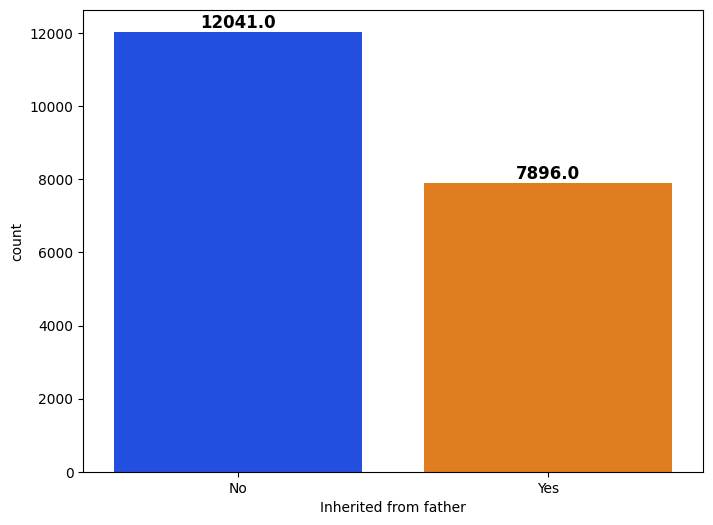

In [324]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Inherited from father", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

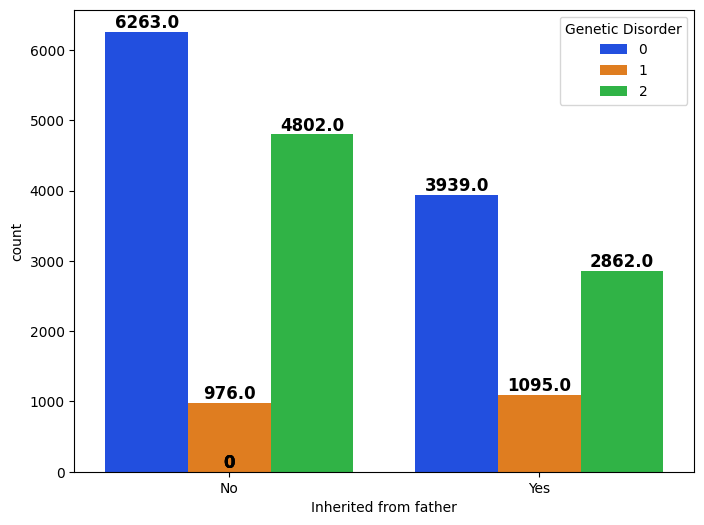

In [325]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Inherited from father", hue="Genetic Disorder", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Maternal gene**

In [326]:
train_data["Maternal gene"]

,Maternal gene
0,Yes
2,No
3,Yes
4,NaN
5,Yes
...,...
22077,Yes
22078,Yes
22079,No
22080,Yes


In [327]:
train_data["Maternal gene"].value_counts()

,count
Maternal gene,
Yes,9671
No,7842


<ipython-input-328-994dde8a3652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Maternal gene", data=train_data, palette="bright")


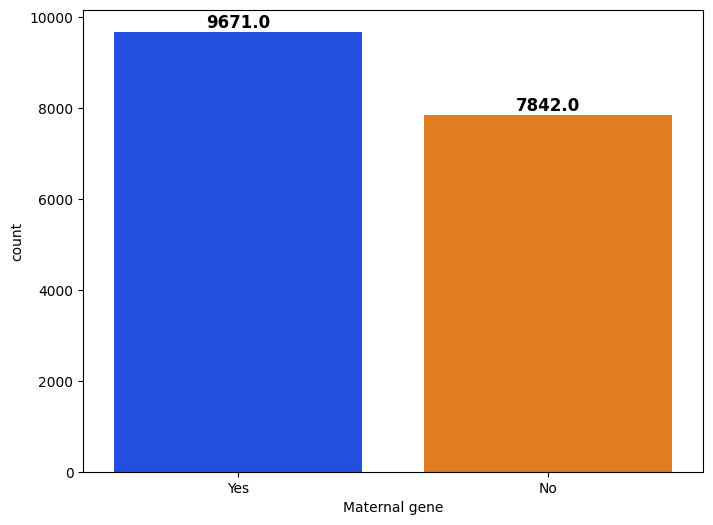

In [328]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Maternal gene", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')



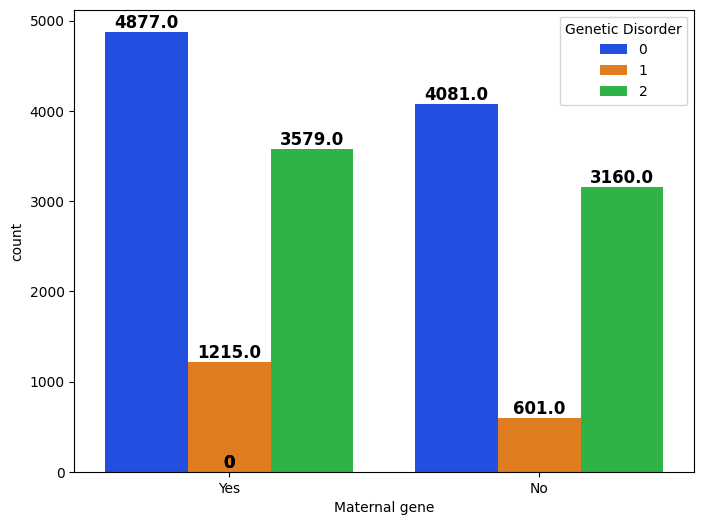

In [329]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Maternal gene", data=train_data, hue="Genetic Disorder", palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [330]:
train_data["Maternal gene"].isnull().sum()

2424

In [331]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Maternal gene')

In [332]:
train_data["Maternal gene"].isnull().sum()

0

<ipython-input-333-ceb3a573cd91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Maternal gene", data=train_data, palette="bright")


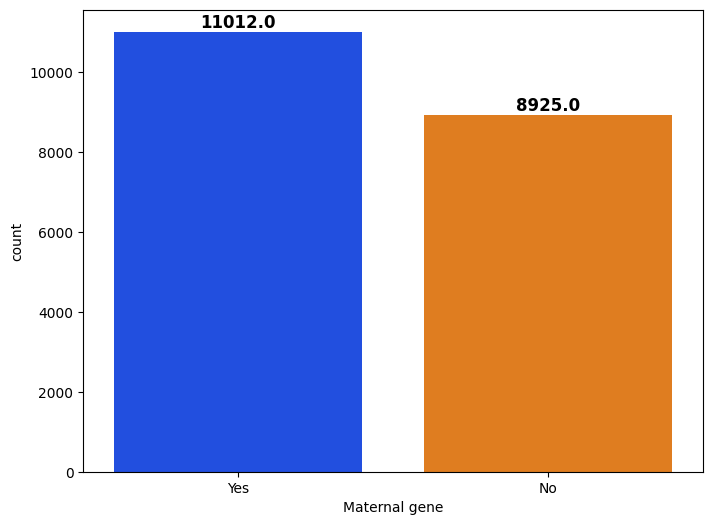

In [333]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="Maternal gene", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [334]:
train_data["Maternal gene"].value_counts()

,count
Maternal gene,
Yes,11012
No,8925


**Paternal gene**

In [335]:
train_data["Paternal gene"]

,Paternal gene
0,No
2,No
3,No
4,Yes
5,No
...,...
22077,Yes
22078,No
22079,Yes
22080,No


In [336]:
train_data["Paternal gene"].value_counts()

,count
Paternal gene,
No,11297
Yes,8640


<ipython-input-337-26f40c1d2489>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Paternal gene", data=train_data, palette="bright")


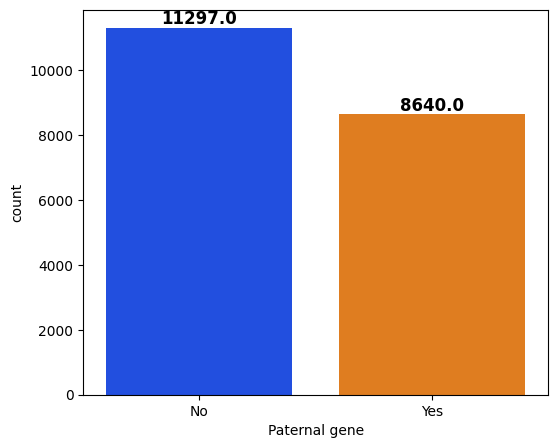

In [337]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Paternal gene", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [338]:
train_data["Paternal gene"].unique()

array(['No', 'Yes'], dtype=object)

In [339]:
train_data["Paternal gene"].isnull().sum()

0

**Blood cell count (mcL)**

In [340]:
train_data["Blood cell count (mcL)"]

,Blood cell count (mcL)
0,4.760603
2,4.893297
3,4.705280
4,4.720703
5,5.103188
...,...
22077,5.012599
22078,5.258298
22079,4.974220
22080,5.186470


In [341]:
train_data["Blood cell count (mcL)"].value_counts()

,count
Blood cell count (mcL),
4.760603,1
4.592124,1
5.127216,1
4.643259,1
4.920964,1
...,...
5.106650,1
5.128740,1
4.769116,1


<Axes: xlabel='Blood cell count (mcL)', ylabel='Genetic Disorder'>

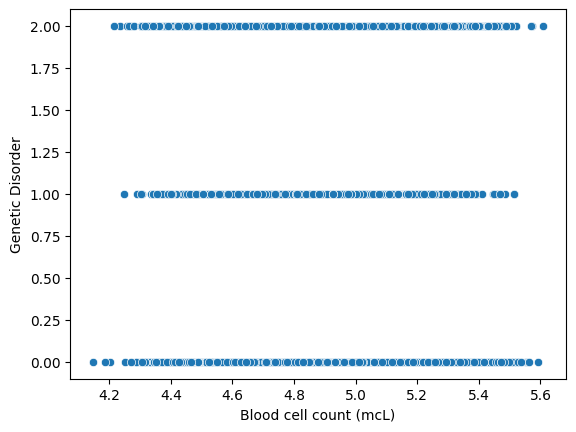

In [342]:
sns.scatterplot(x="Blood cell count (mcL)", y="Genetic Disorder", data=train_data)

In [343]:
train_data["Blood cell count (mcL)"].isnull().sum()

0

In [344]:
train_data["Blood cell count (mcL)"].unique()

array([4.76060309, 4.89329743, 4.70528039, ..., 4.97422049, 5.1864702 ,
       4.73806671])

**Status**

In [345]:
train_data["Status"]

,Status
0,Alive
2,Alive
3,Deceased
4,Alive
5,Deceased
...,...
22077,Deceased
22078,Deceased
22079,Alive
22080,Deceased


In [346]:
train_data["Status"].value_counts()

,count
Status,
Alive,10011
Deceased,9926


<ipython-input-347-eb84bcd78370>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Status", data=train_data, palette="bright")


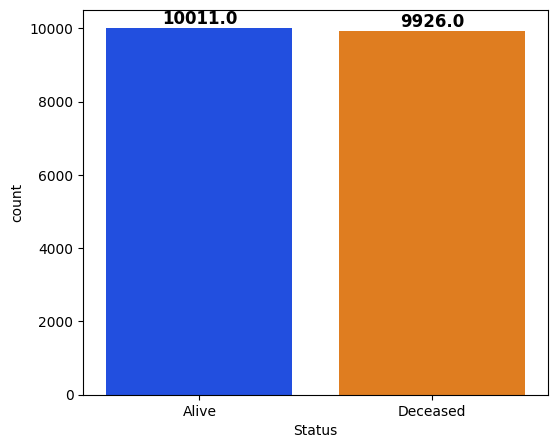

In [347]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Status", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [348]:
train_data["Status"].isnull().sum()

0

In [349]:
train_data["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

**Respiratory Rate (breaths/min)**

In [350]:
train_data["Respiratory Rate (breaths/min)"]

,Respiratory Rate (breaths/min)
0,Normal (30-60)
2,Normal (30-60)
3,Tachypnea
4,Tachypnea
5,NaN
...,...
22077,NaN
22078,Normal (30-60)
22079,Normal (30-60)
22080,Tachypnea


In [351]:
train_data["Respiratory Rate (breaths/min)"].value_counts()

,count
Respiratory Rate (breaths/min),
Normal (30-60),9115
Tachypnea,8996


<ipython-input-352-7854e35aa2d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Respiratory Rate (breaths/min)", data=train_data, palette="bright")


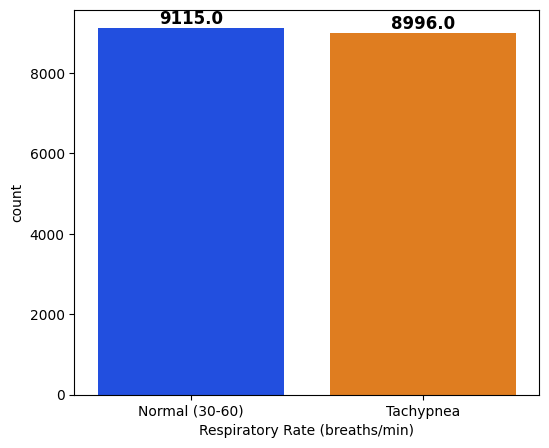

In [352]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Respiratory Rate (breaths/min)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [353]:
train_data["Respiratory Rate (breaths/min)"].unique()

array(['Normal (30-60)', 'Tachypnea', nan], dtype=object)

In [354]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Respiratory Rate (breaths/min)')

In [355]:
train_data["Respiratory Rate (breaths/min)"].unique()

array(['Normal (30-60)', 'Tachypnea'], dtype=object)

<ipython-input-356-7854e35aa2d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Respiratory Rate (breaths/min)", data=train_data, palette="bright")


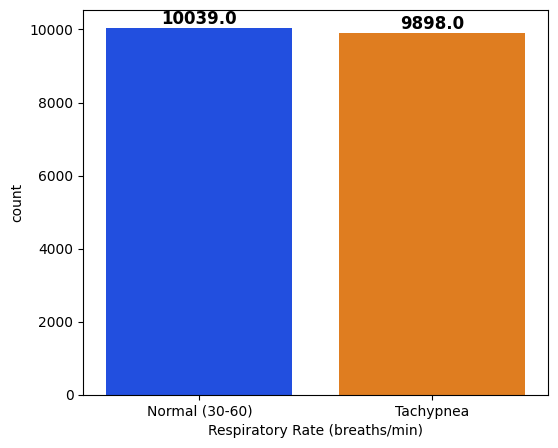

In [356]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Respiratory Rate (breaths/min)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Heart Rate (rates/min**

In [357]:
train_data["Heart Rate (rates/min"]

,Heart Rate (rates/min
0,Normal
2,Tachycardia
3,Normal
4,Tachycardia
5,Normal
...,...
22077,Normal
22078,Tachycardia
22079,Normal
22080,Normal


In [358]:
train_data["Heart Rate (rates/min"].value_counts()

,count
Heart Rate (rates/min,
Normal,9247
Tachycardia,8885


<ipython-input-359-aa0d8b5dd8f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Heart Rate (rates/min", data=train_data, palette="bright")


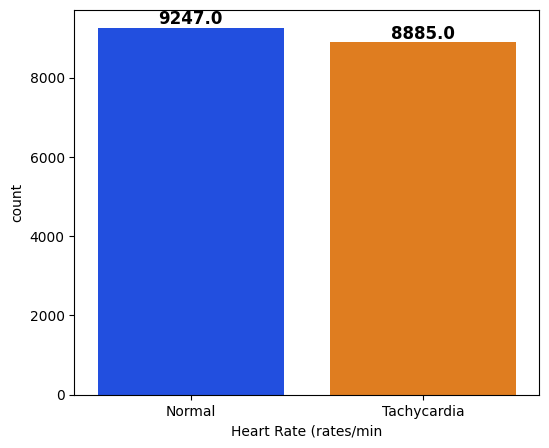

In [359]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Heart Rate (rates/min", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [360]:
train_data["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia', nan], dtype=object)

In [361]:
train_data["Heart Rate (rates/min"].isnull().sum()

1805

In [362]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Heart Rate (rates/min')

In [363]:
train_data["Heart Rate (rates/min"].unique()

array(['Normal', 'Tachycardia'], dtype=object)

In [364]:
train_data["Heart Rate (rates/min"].isnull().sum()

0

<ipython-input-365-aa0d8b5dd8f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Heart Rate (rates/min", data=train_data, palette="bright")


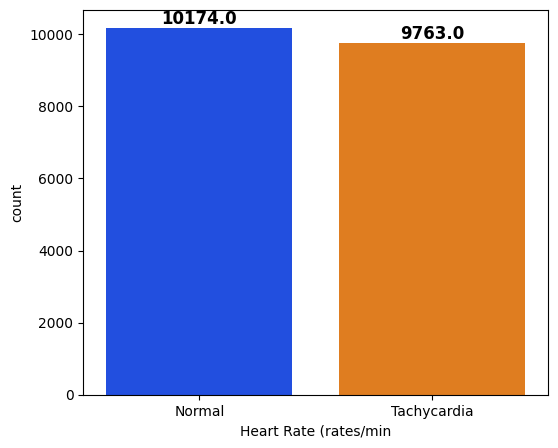

In [365]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Heart Rate (rates/min", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Test 1, Test 2, Test 3, Test 4, Test 5**

<ipython-input-366-8ed25c77c85f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test 1", data=train_data, palette="bright")


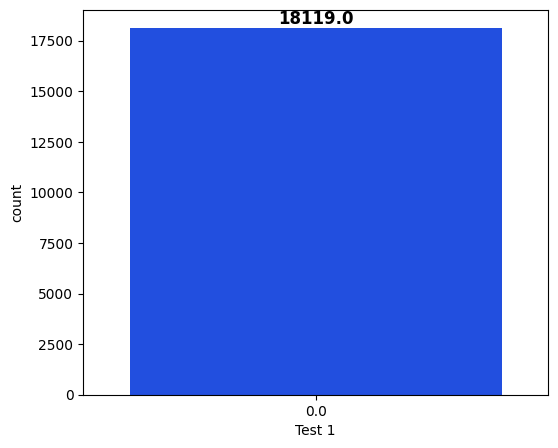

In [366]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Test 1", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

<ipython-input-367-5376b8940b36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test 2", data=train_data, palette="bright")


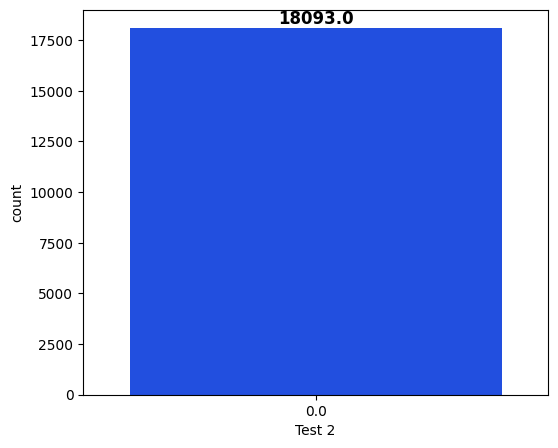

In [367]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Test 2", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

<ipython-input-368-074acae9a77c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test 3", data=train_data, palette="bright")


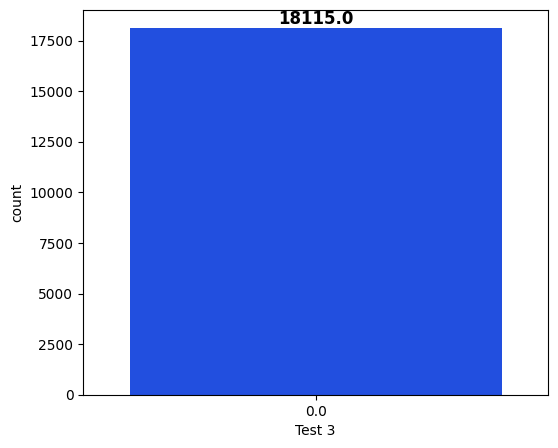

In [368]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Test 3", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

<ipython-input-369-dafe69766ec2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test 4", data=train_data, palette="bright")


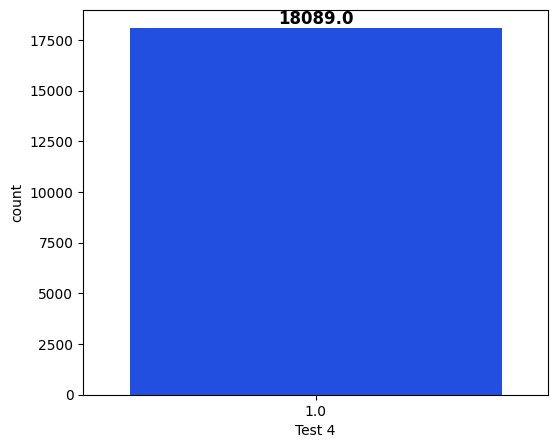

In [369]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Test 4", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

<ipython-input-370-dea20555372b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test 5", data=train_data, palette="bright")


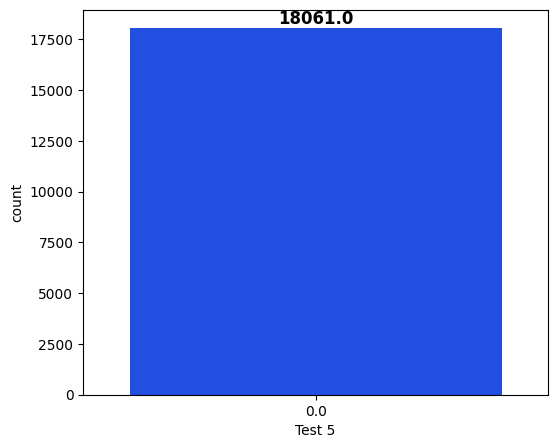

In [370]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Test 5", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Parental consent**

In [371]:
train_data["Parental consent"]

,Parental consent
0,Yes
2,Yes
3,Yes
4,NaN
5,Yes
...,...
22077,Yes
22078,Yes
22079,NaN
22080,Yes


In [372]:
train_data["Parental consent"].value_counts()

,count
Parental consent,
Yes,18118


In [373]:
train_data["Parental consent"].unique()

array(['Yes', nan], dtype=object)

In [374]:
train_data["Parental consent"].isnull().sum()

1819

<ipython-input-375-593281805148>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Parental consent", data=train_data, palette="bright")


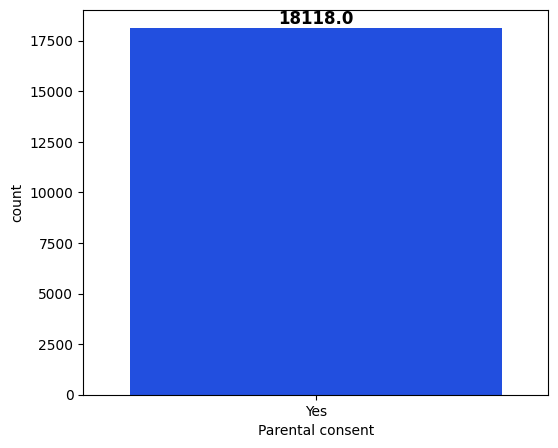

In [375]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Parental consent", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

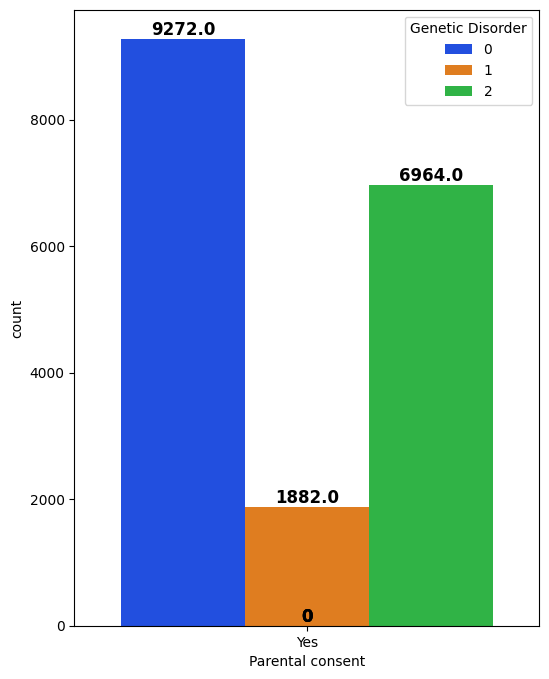

In [376]:
plt.figure(figsize=(6, 8))

ax = sns.countplot(x="Parental consent", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [377]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Parental consent')

In [378]:
train_data["Parental consent"].unique()

array(['Yes'], dtype=object)

In [379]:
train_data["Parental consent"].isnull().sum()

0

<ipython-input-380-593281805148>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Parental consent", data=train_data, palette="bright")


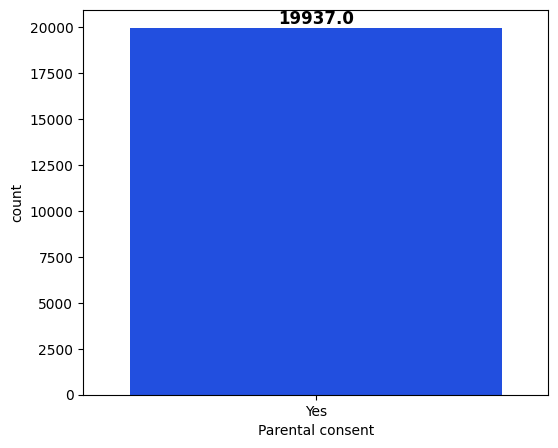

In [380]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Parental consent", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

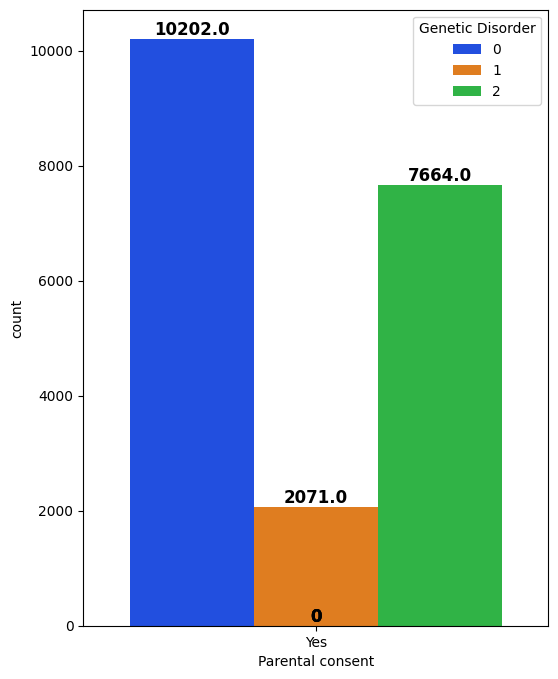

In [381]:
plt.figure(figsize=(6, 8))

ax = sns.countplot(x="Parental consent", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [382]:
train_data = train_data.drop(columns=["Test 1" , "Test 2", "Test 3", "Test 4", "Test 5", "Parental consent"])

**Follow-up**

In [383]:
train_data["Follow-up"]

,Follow-up
0,High
2,Low
3,High
4,Low
5,Low
...,...
22077,NaN
22078,High
22079,High
22080,High


In [384]:
train_data["Follow-up"].value_counts()

,count
Follow-up,
Low,9129
High,8946


In [385]:
train_data["Follow-up"].unique()

array(['High', 'Low', nan], dtype=object)

In [386]:
train_data["Follow-up"].isnull().sum()

1862

<ipython-input-387-4c4239b249ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Follow-up", data=train_data, palette="bright")


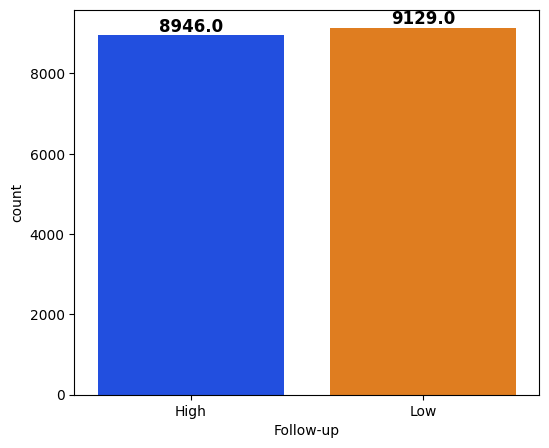

In [387]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Follow-up", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

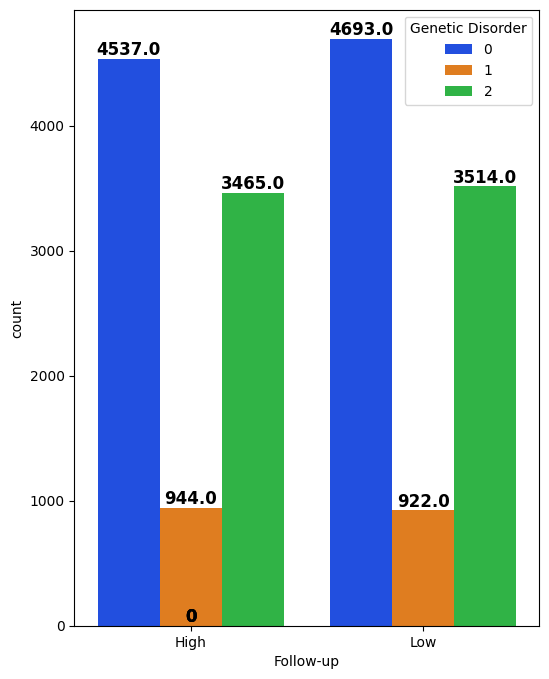

In [388]:
plt.figure(figsize=(6, 8))

ax = sns.countplot(x="Follow-up", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [389]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Follow-up')

In [390]:
train_data["Follow-up"].unique()

array(['High', 'Low'], dtype=object)

In [391]:
train_data["Follow-up"].isnull().sum()

0

<ipython-input-392-4c4239b249ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Follow-up", data=train_data, palette="bright")


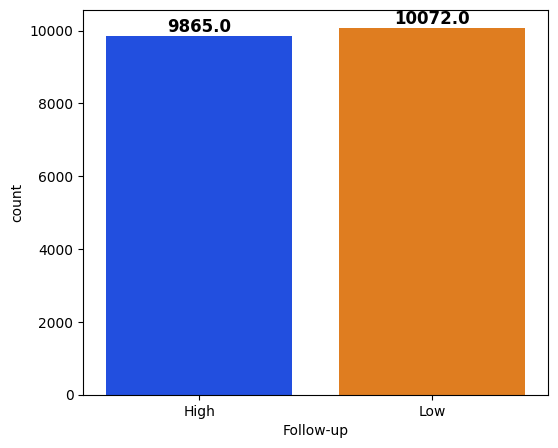

In [392]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Follow-up", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

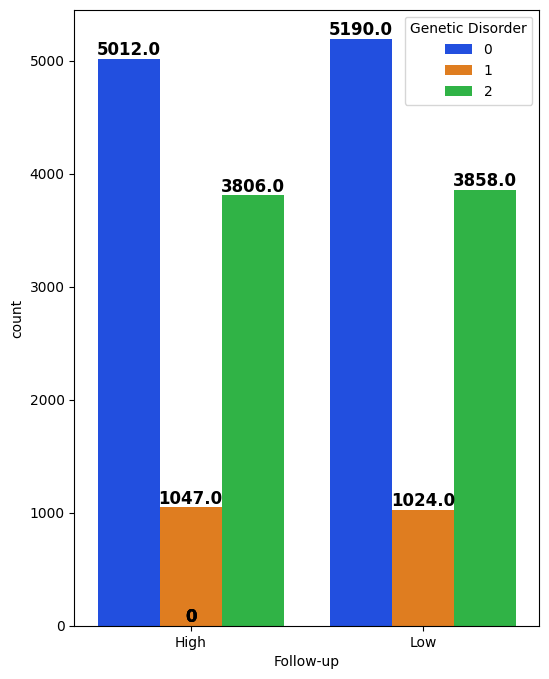

In [393]:
plt.figure(figsize=(6, 8))

ax = sns.countplot(x="Follow-up", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Gender**

In [394]:
train_data["Gender"]

,Gender
0,NaN
2,NaN
3,Male
4,Male
5,Female
...,...
22077,Ambiguous
22078,Female
22079,Ambiguous
22080,Male


In [395]:
train_data["Gender"].value_counts()

,count
Gender,
Ambiguous,6068
Male,6059
Female,5966


In [396]:
train_data["Gender"].unique()

array([nan, 'Male', 'Female', 'Ambiguous'], dtype=object)

In [397]:
train_data["Gender"].isnull().sum()

1844

<ipython-input-398-96a3392cee9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=train_data, palette="bright")


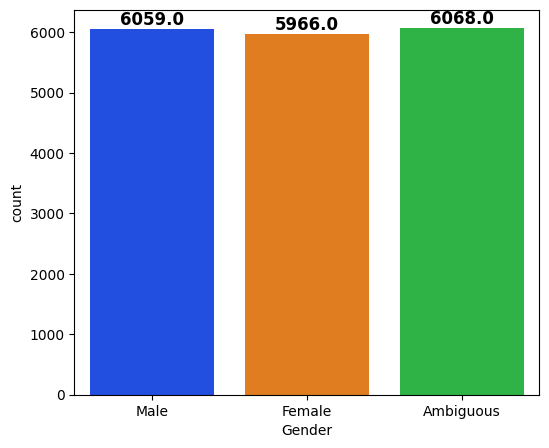

In [398]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Gender", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

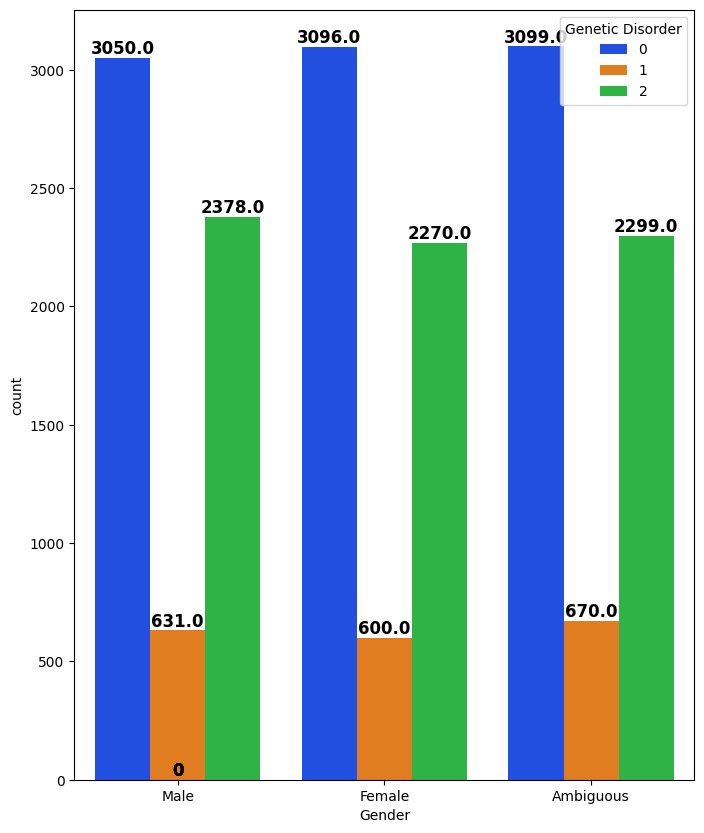

In [399]:
plt.figure(figsize=(8, 10))

ax = sns.countplot(x="Gender", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [400]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Gender')

In [401]:
train_data["Gender"].unique()

array(['Male', 'Female', 'Ambiguous'], dtype=object)

In [402]:
train_data["Gender"].isnull().sum()

0

<ipython-input-403-96a3392cee9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=train_data, palette="bright")


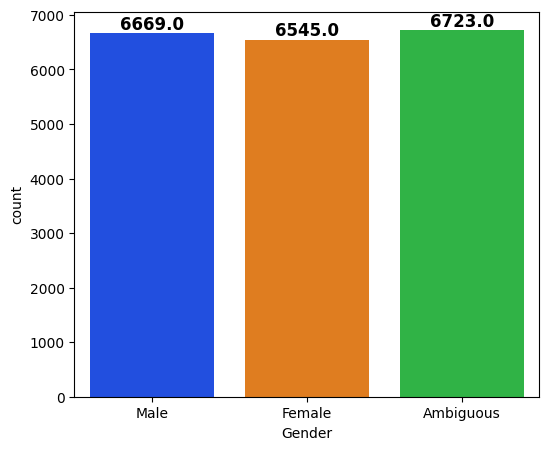

In [403]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Gender", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

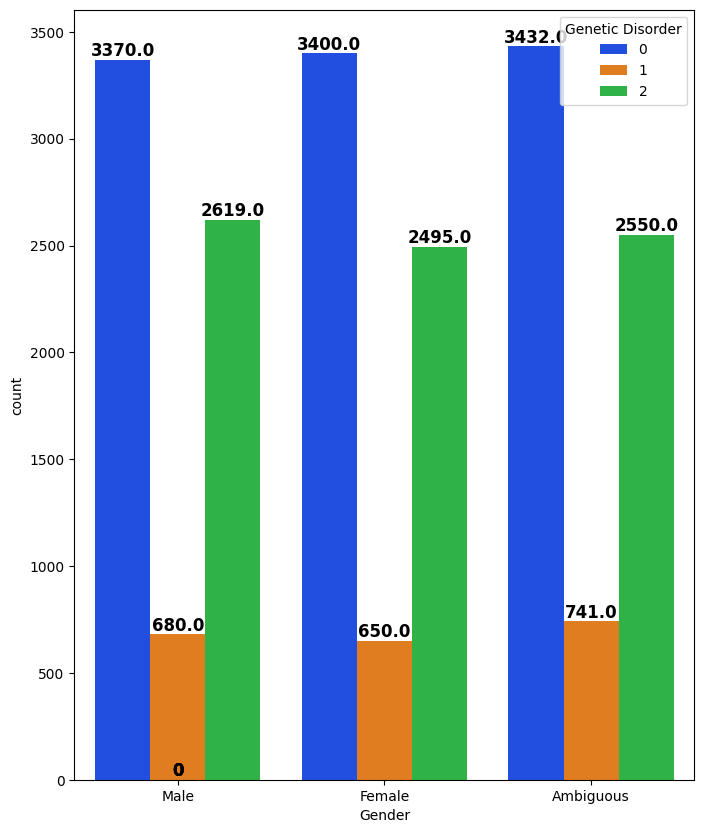

In [404]:
plt.figure(figsize=(8, 10))

ax = sns.countplot(x="Gender", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Birth asphyxia**

In [405]:
train_data["Birth asphyxia"]

,Birth asphyxia
0,NaN
2,No record
3,Not available
4,Not available
5,Not available
...,...
22077,No record
22078,No
22079,No
22080,No


In [406]:
train_data["Birth asphyxia"].value_counts()

,count
Birth asphyxia,
Yes,4641
No record,4520
Not available,4518
No,4410


In [407]:
train_data["Birth asphyxia"].unique()

array([nan, 'No record', 'Not available', 'Yes', 'No'], dtype=object)

In [408]:
train_data["Birth asphyxia"].isnull().sum()

1848

<ipython-input-409-660e53fbab0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright")


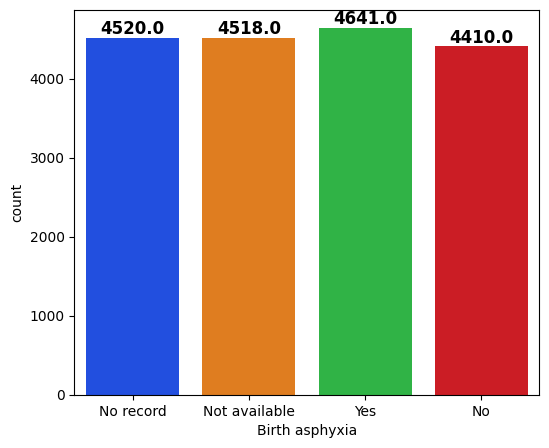

In [409]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

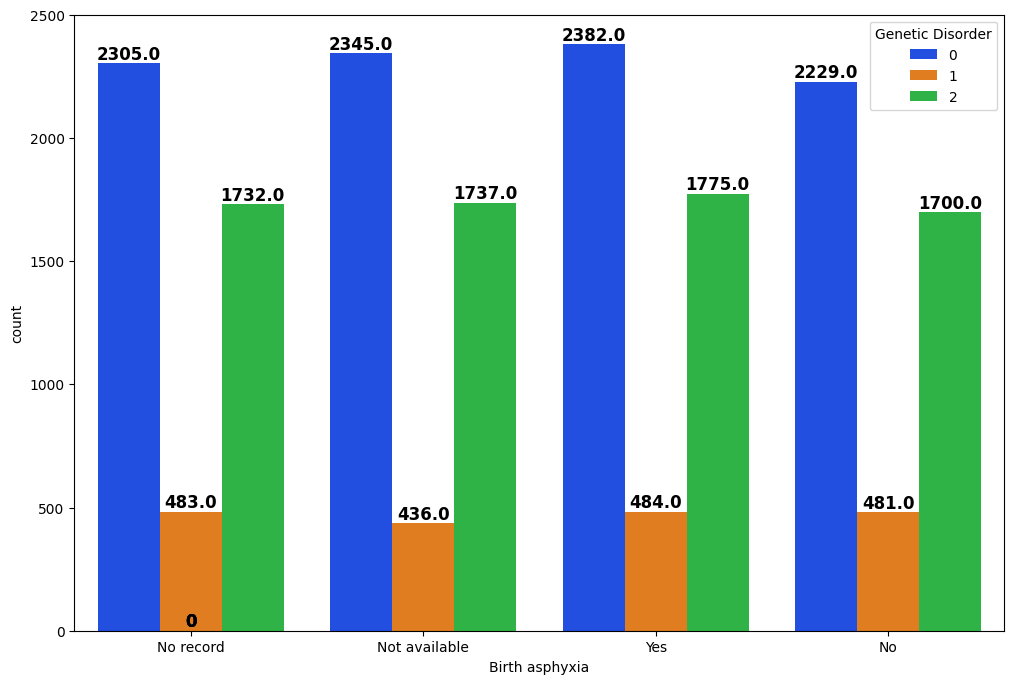

In [410]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [411]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Birth asphyxia')

<ipython-input-412-660e53fbab0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright")


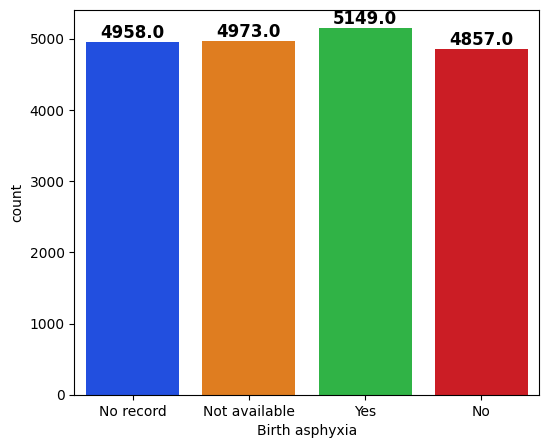

In [412]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

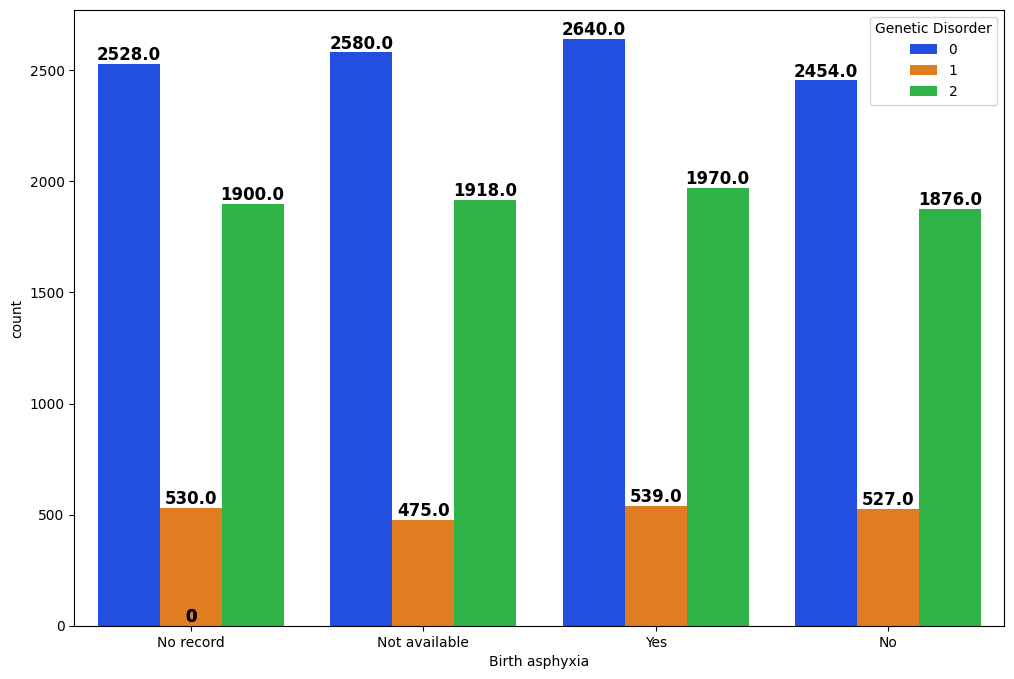

In [413]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Birth asphyxia", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Autopsy shows birth defect (if applicable)**

In [414]:
train_data["Autopsy shows birth defect (if applicable)"]

,Autopsy shows birth defect (if applicable)
0,Not applicable
2,Not applicable
3,No
4,Not applicable
5,NaN
...,...
22077,Yes
22078,No
22079,Not applicable
22080,NaN


In [415]:
train_data["Autopsy shows birth defect (if applicable)"].value_counts()

,count
Autopsy shows birth defect (if applicable),
Not applicable,10011
Yes,3082
No,2909


In [416]:
train_data["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', 'No', nan, 'Yes'], dtype=object)

In [417]:
train_data["Autopsy shows birth defect (if applicable)"].isnull().sum()

3935

<ipython-input-418-201b4662ee75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright")


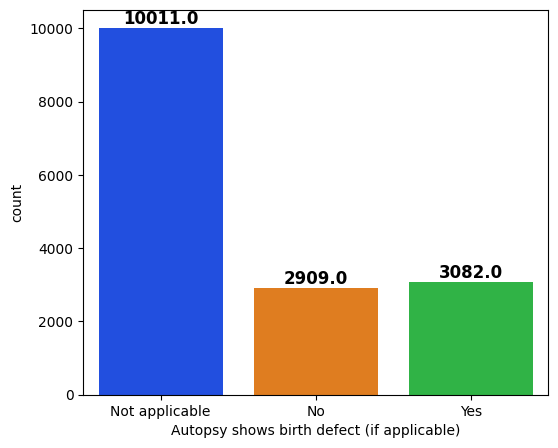

In [418]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

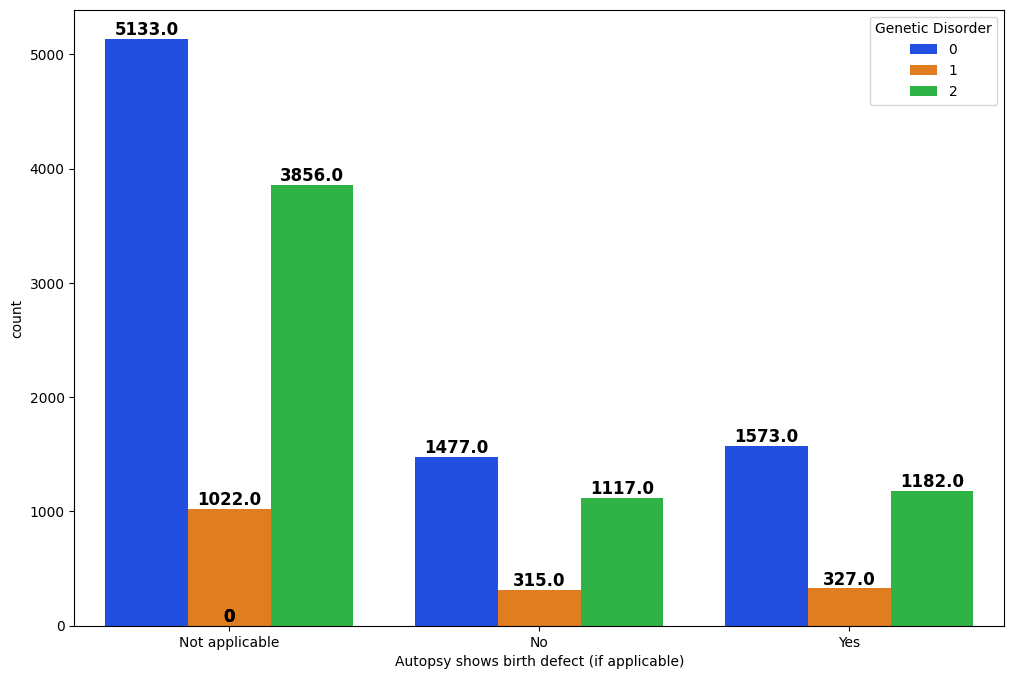

In [419]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [420]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Autopsy shows birth defect (if applicable)')

In [421]:
train_data["Autopsy shows birth defect (if applicable)"].unique()

array(['Not applicable', 'No', 'Yes'], dtype=object)

In [422]:
train_data["Autopsy shows birth defect (if applicable)"].isnull().sum()

0

<ipython-input-423-201b4662ee75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright")


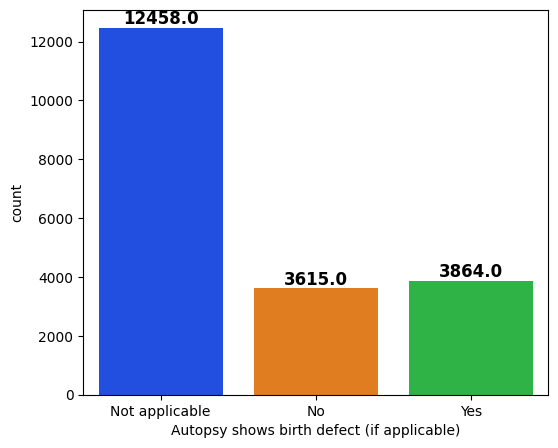

In [423]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

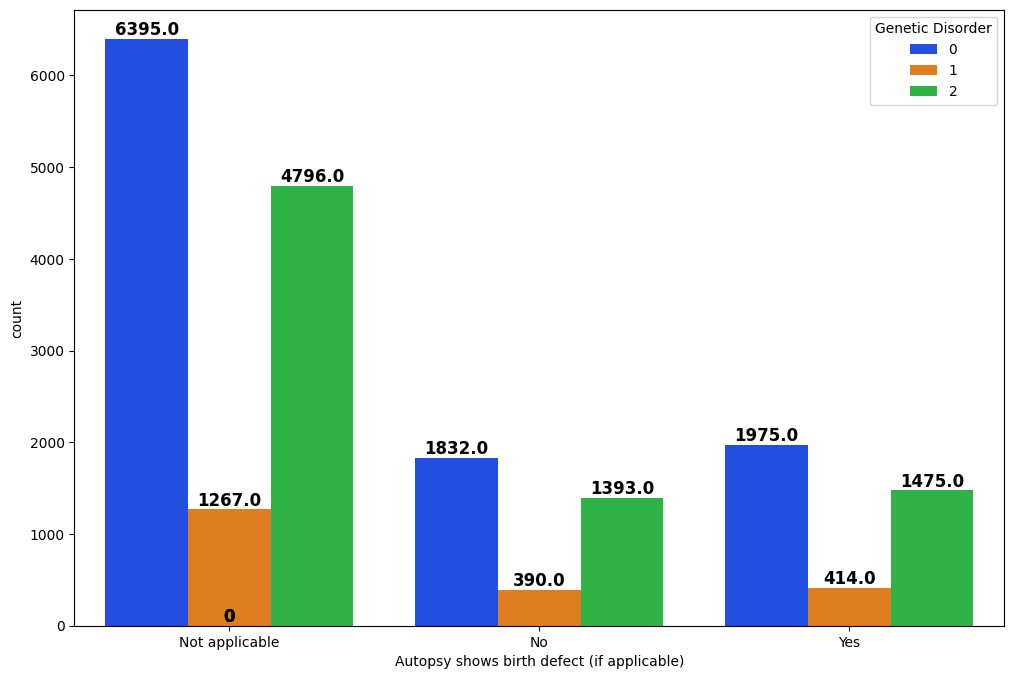

In [424]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Autopsy shows birth defect (if applicable)", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Place of birth**

In [425]:
train_data["Place of birth"]

,Place of birth
0,Institute
2,NaN
3,Institute
4,Institute
5,Institute
...,...
22077,Home
22078,Institute
22079,Institute
22080,Home


In [426]:
train_data["Place of birth"].value_counts()

,count
Place of birth,
Institute,9153
Home,8964


In [427]:
train_data["Place of birth"].unique()

array(['Institute', nan, 'Home'], dtype=object)

In [428]:
train_data["Place of birth"].isnull().sum()

1820

<ipython-input-429-bf6edaf5f91b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Place of birth", data=train_data, palette="bright")


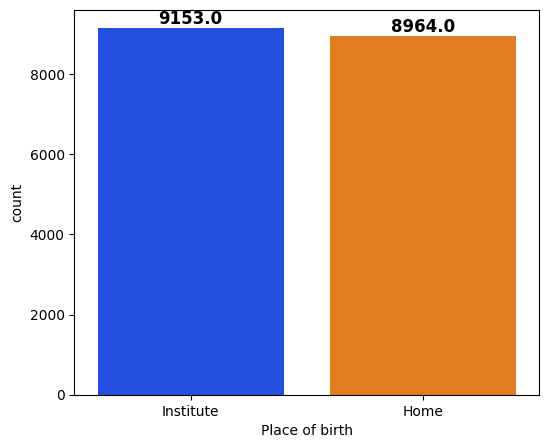

In [429]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Place of birth", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

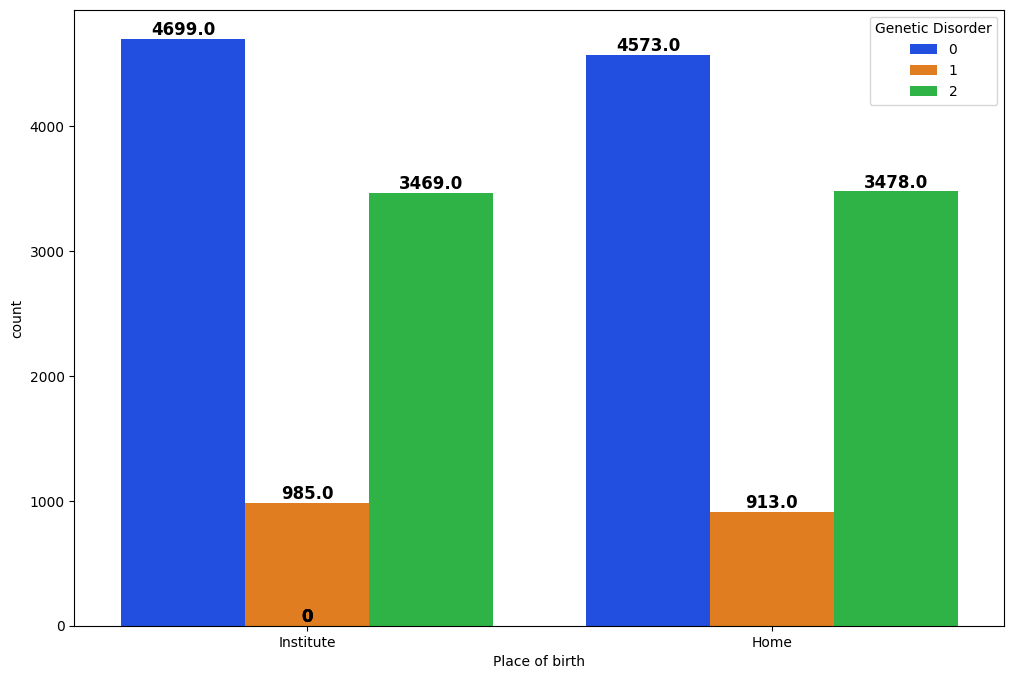

In [430]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Place of birth", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [431]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Place of birth')

In [432]:
train_data["Place of birth"].unique()

array(['Institute', 'Home'], dtype=object)

In [433]:
train_data["Place of birth"].isnull().sum()

0

<ipython-input-434-bf6edaf5f91b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Place of birth", data=train_data, palette="bright")


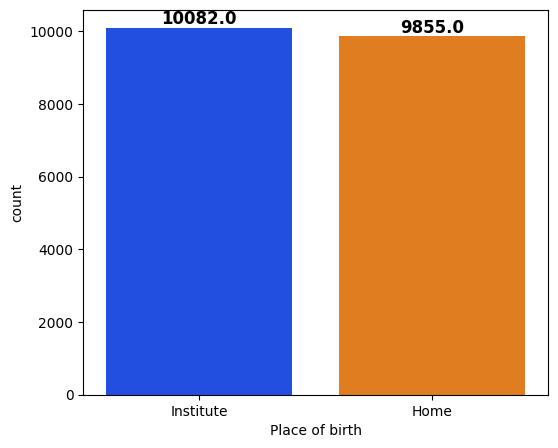

In [434]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Place of birth", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

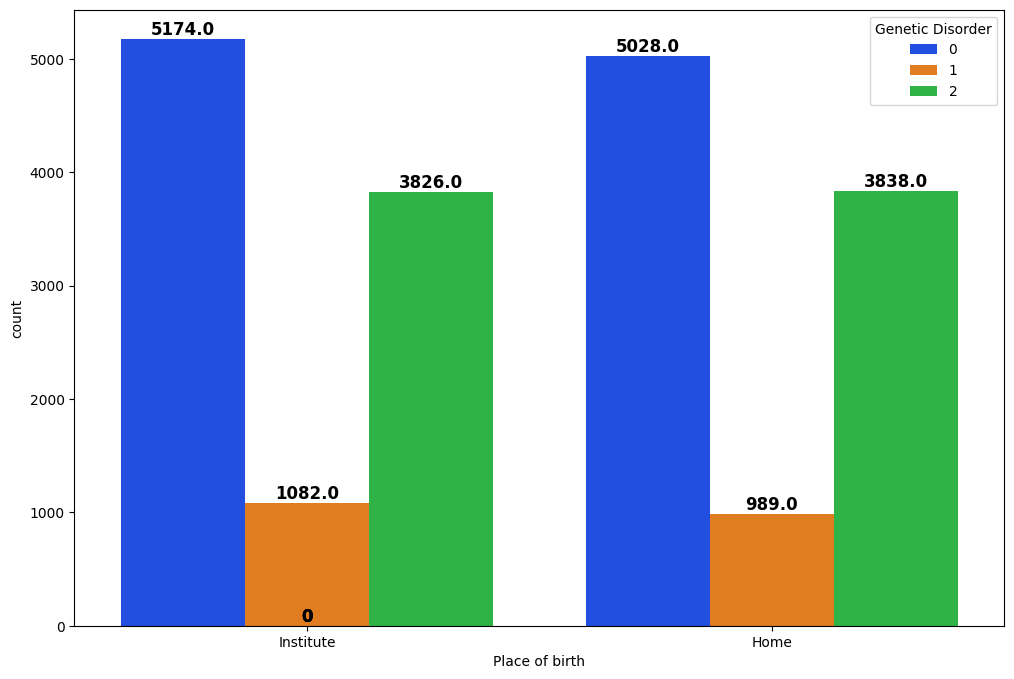

In [435]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Place of birth", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Folic acid details (peri-conceptional)**

In [436]:
train_data["Folic acid details (peri-conceptional)"]

,Folic acid details (peri-conceptional)
0,No
2,Yes
3,No
4,No
5,No
...,...
22077,Yes
22078,NaN
22079,Yes
22080,No


In [437]:
train_data["Folic acid details (peri-conceptional)"].value_counts()

,count
Folic acid details (peri-conceptional),
Yes,9173
No,8950


In [438]:
train_data["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes', nan], dtype=object)

In [439]:
train_data["Folic acid details (peri-conceptional)"].isnull().sum()

1814

<ipython-input-440-a8807bfbe989>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright")


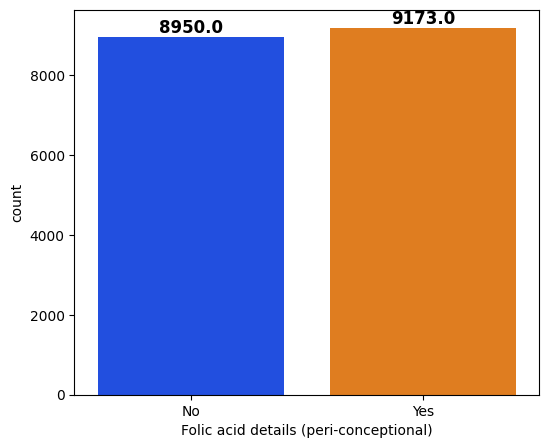

In [440]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

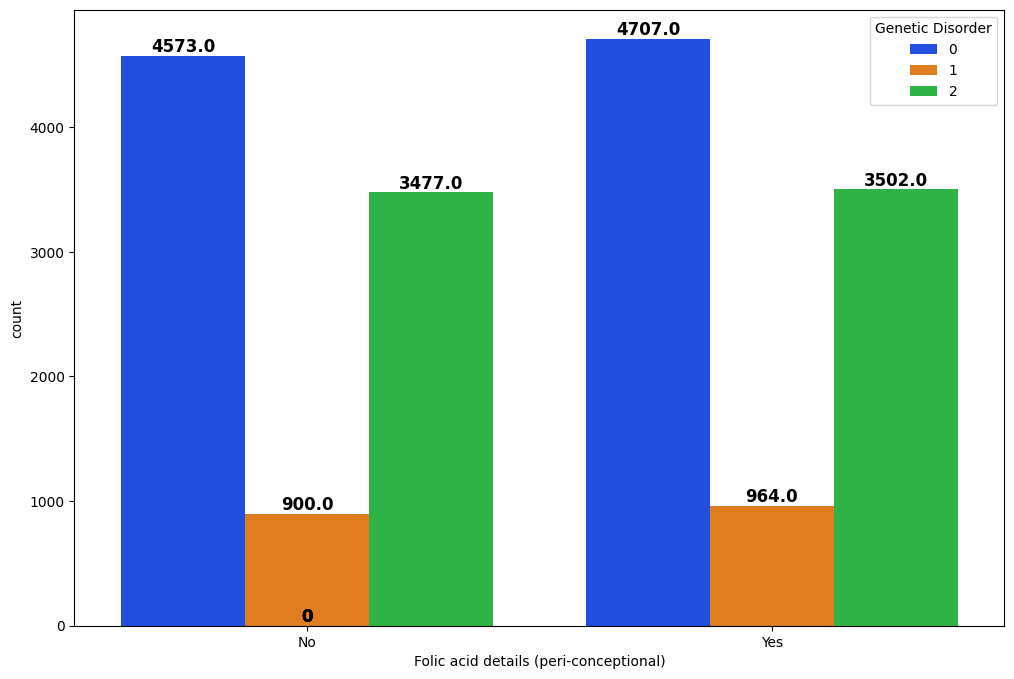

In [441]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [442]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Folic acid details (peri-conceptional)')

In [443]:
train_data["Folic acid details (peri-conceptional)"].unique()

array(['No', 'Yes'], dtype=object)

In [444]:
train_data["Folic acid details (peri-conceptional)"].isnull().sum()

0

<ipython-input-445-a8807bfbe989>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright")


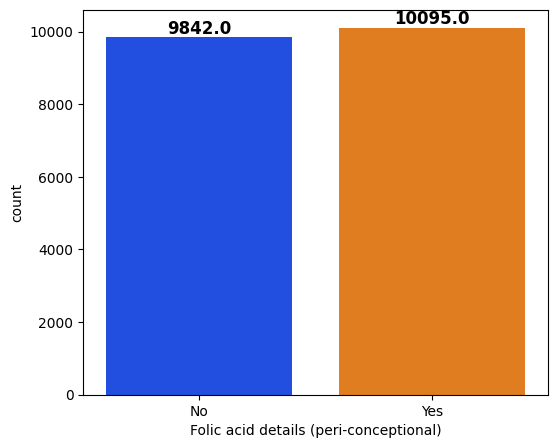

In [445]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

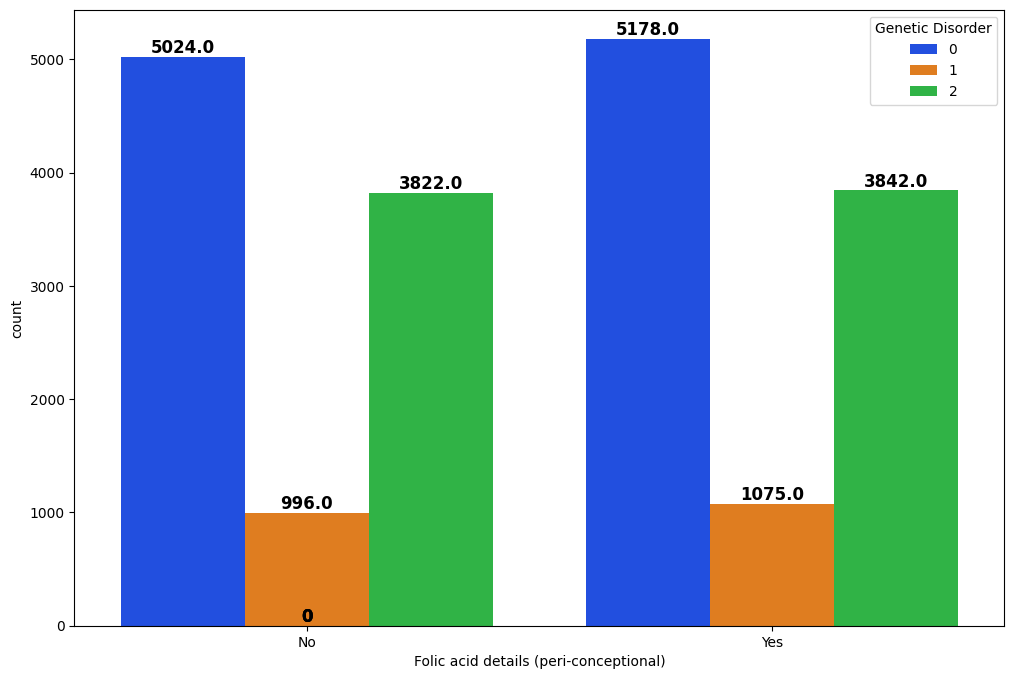

In [446]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(x="Folic acid details (peri-conceptional)", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**H/O serious maternal illness, H/O radiation exposure (x-ray), H/O substance abuse, Assisted conception IVF/ART, History of anomalies in previous pregnancies**

In [447]:
train_data["H/O serious maternal illness"].value_counts()

,count
H/O serious maternal illness,
No,9093
Yes,9020


In [448]:
train_data["H/O radiation exposure (x-ray)"].value_counts()

,count
H/O radiation exposure (x-ray),
Not applicable,4593
Yes,4538
No,4525
-,4451


In [449]:
train_data["H/O substance abuse"].value_counts()

,count
H/O substance abuse,
No,4601
-,4547
Yes,4516
Not applicable,4373


In [450]:
train_data["Assisted conception IVF/ART"].value_counts()

,count
Assisted conception IVF/ART,
Yes,9084
No,9006


In [451]:
train_data["History of anomalies in previous pregnancies"].value_counts()

,count
History of anomalies in previous pregnancies,
Yes,9085
No,8959


In [452]:
train_data["White Blood cell count (thousand per microliter)"].value_counts()

,count
White Blood cell count (thousand per microliter),
3.000000,1213
12.000000,1196
9.857562,1
9.067686,1
9.739904,1
...,...
5.170352,1
4.383106,1
7.854600,1


In [453]:
# Handle missing value for H/O serious maternal illness
train_data = impute_categorical_with_proportions_improved(train_data, 'H/O serious maternal illness')

In [454]:
# Handle missing value for H/O radiation exposure (x-ray)
train_data = impute_categorical_with_proportions_improved(train_data, 'H/O radiation exposure (x-ray)')

In [455]:
# Handle missing value for H/O substance abuse
train_data = impute_categorical_with_proportions_improved(train_data, 'H/O substance abuse')

In [456]:
# Handle missing value for Assisted conception IVF/ART
train_data = impute_categorical_with_proportions_improved(train_data, 'Assisted conception IVF/ART')

In [457]:
# Handle missing value for History of anomalies in previous pregnancies
train_data = impute_categorical_with_proportions_improved(train_data, 'History of anomalies in previous pregnancies')

In [458]:
# Handle missing value for White Blood cell count (thousand per microliter)
train_data = impute_numeric_with_kde(train_data, 'White Blood cell count (thousand per microliter)', valid_range=(3, 12))

**No. of previous abortion**

In [459]:
train_data["No. of previous abortion"]

,No. of previous abortion
0,NaN
2,4.0
3,1.0
4,4.0
5,0.0
...,...
22077,NaN
22078,3.0
22079,2.0
22080,2.0


In [460]:
train_data["No. of previous abortion"].value_counts()

,count
No. of previous abortion,
2.0,3736
4.0,3618
0.0,3615
1.0,3576
3.0,3564


In [461]:
train_data["No. of previous abortion"].unique()

array([nan,  4.,  1.,  0.,  3.,  2.])

In [462]:
train_data["No. of previous abortion"].isnull().sum()

1828

<ipython-input-463-59e3d7278948>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright")


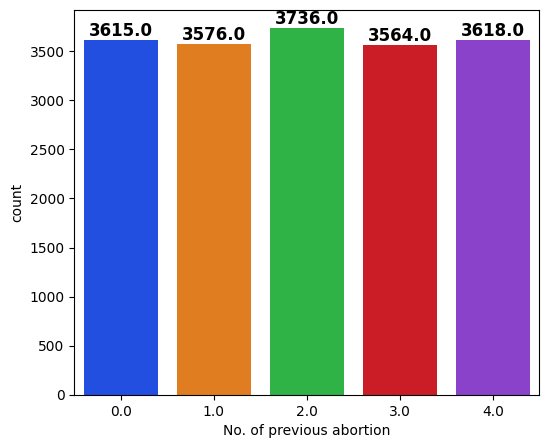

In [463]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

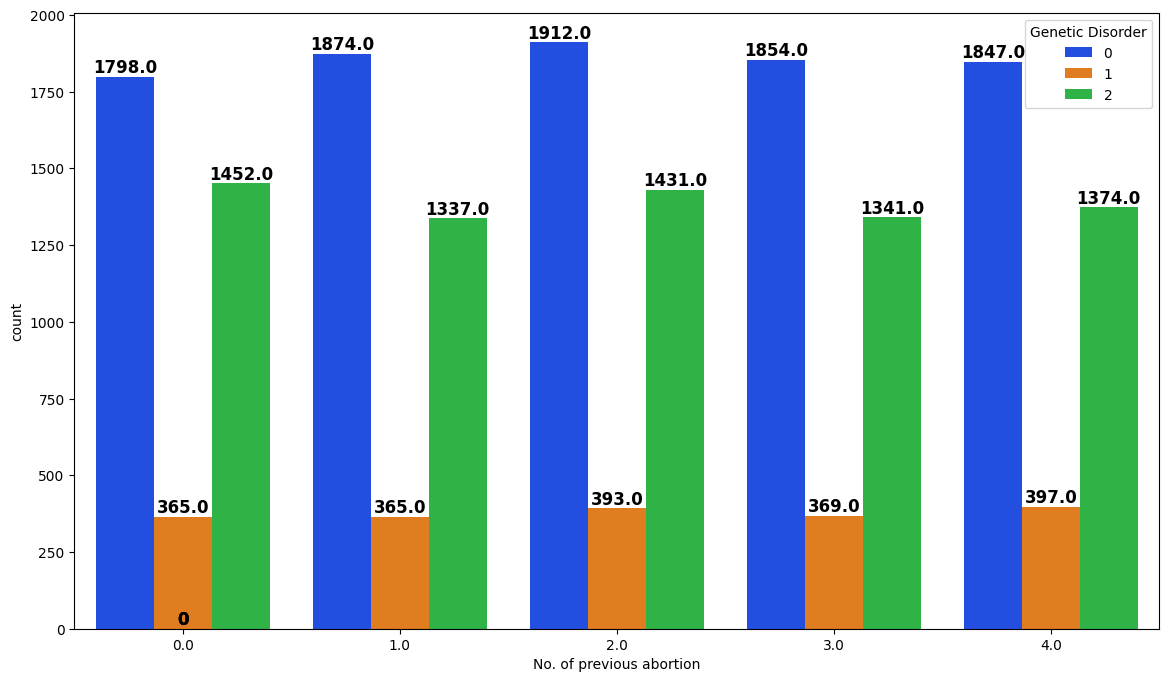

In [464]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [465]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'No. of previous abortion')

In [466]:
train_data["No. of previous abortion"].unique()

array([4., 1., 0., 3., 2.])

In [467]:
train_data["No. of previous abortion"].isnull().sum()

0

<ipython-input-468-59e3d7278948>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright")


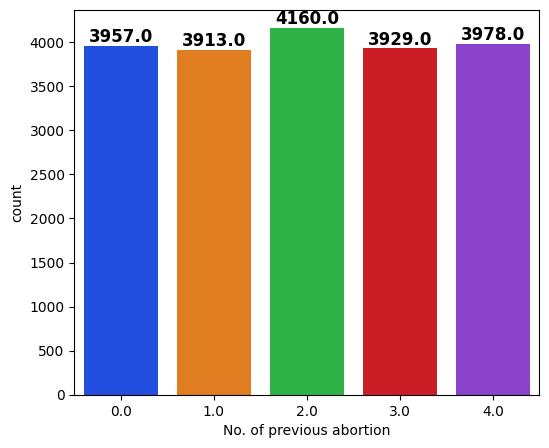

In [468]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

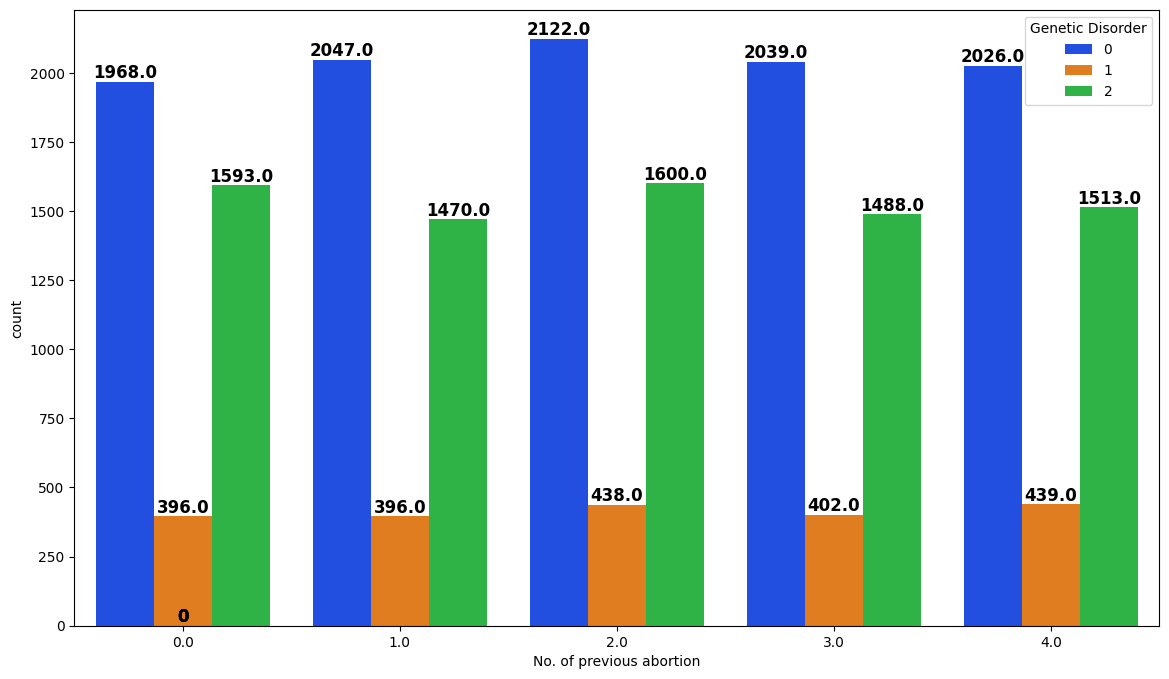

In [469]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="No. of previous abortion", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Birth defects**

In [470]:
train_data["Birth defects"]

,Birth defects
0,NaN
2,Singular
3,Singular
4,Multiple
5,Multiple
...,...
22077,NaN
22078,Multiple
22079,Multiple
22080,Singular


In [471]:
train_data["Birth defects"].value_counts()

,count
Birth defects,
Multiple,9056
Singular,9042


In [472]:
train_data["Birth defects"].unique()

array([nan, 'Singular', 'Multiple'], dtype=object)

In [473]:
train_data["Birth defects"].isnull().sum()

1839

<ipython-input-474-e821bef10c93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Birth defects", data=train_data, palette="bright")


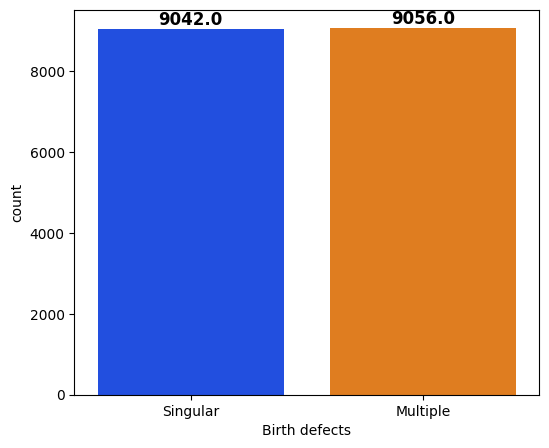

In [474]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Birth defects", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

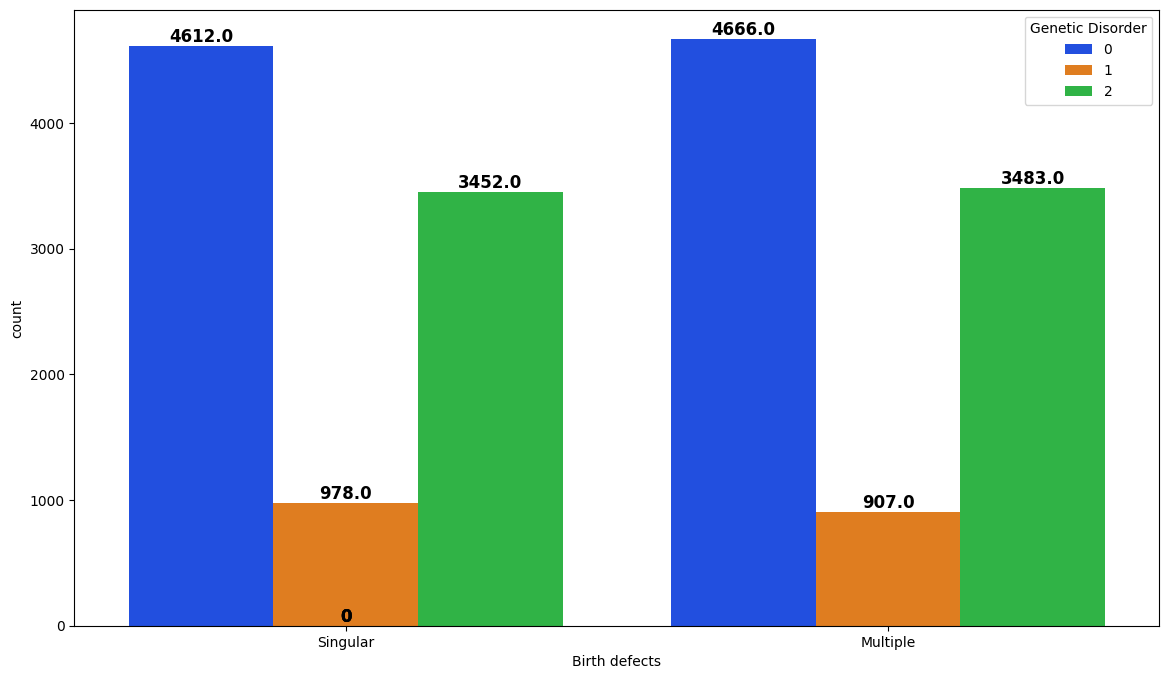

In [475]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="Birth defects", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

In [476]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Birth defects')

In [477]:
train_data["Birth defects"].unique()

array(['Multiple', 'Singular'], dtype=object)

In [478]:
train_data["Birth defects"].isnull().sum()

0

<ipython-input-479-e821bef10c93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Birth defects", data=train_data, palette="bright")


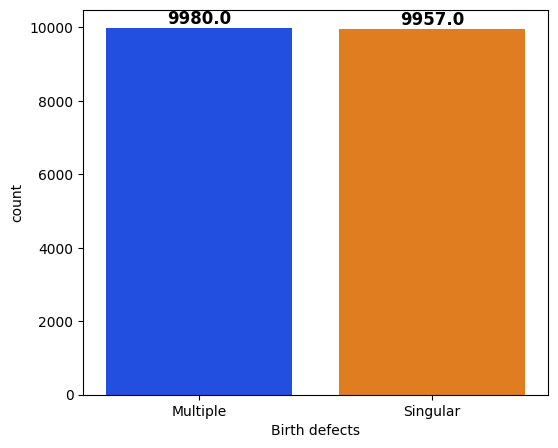

In [479]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x="Birth defects", data=train_data, palette="bright")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

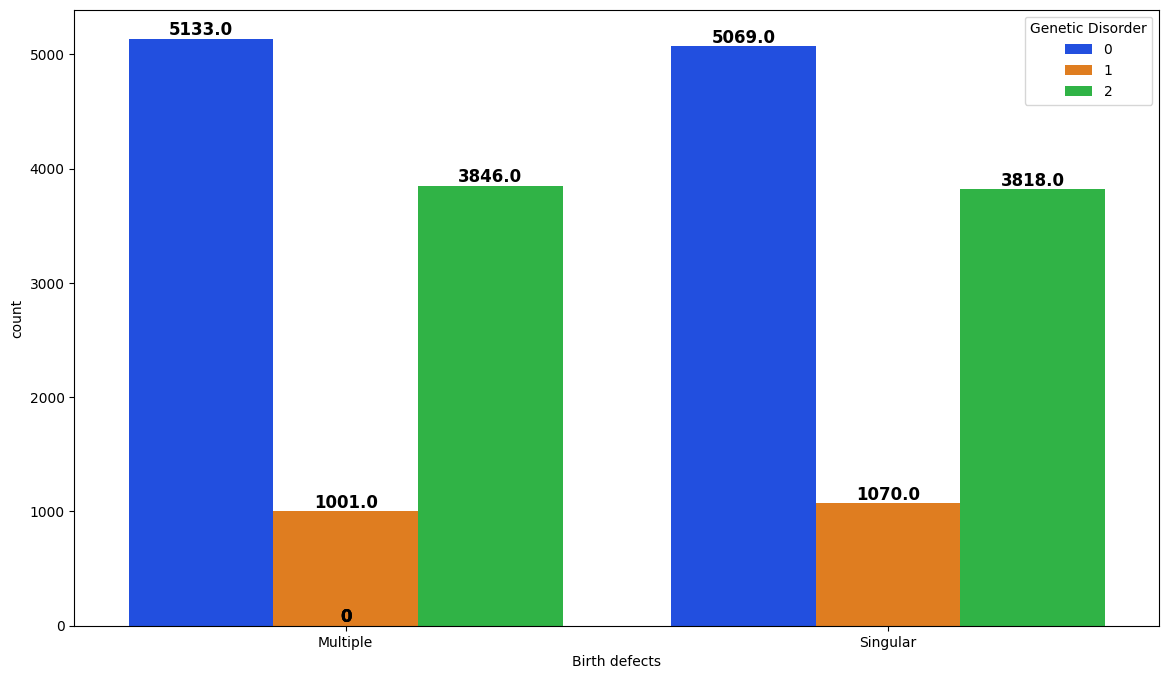

In [480]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x="Birth defects", data=train_data, palette="bright", hue="Genetic Disorder")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

**Blood test result**

In [481]:
train_data["Blood test result"]

,Blood test result
0,NaN
2,normal
3,inconclusive
4,NaN
5,normal
...,...
22077,slightly abnormal
22078,inconclusive
22079,inconclusive
22080,normal


In [482]:
train_data["Blood test result"].value_counts()

,count
Blood test result,
slightly abnormal,4644
normal,4521
inconclusive,4511
abnormal,4428


In [483]:
train_data["Blood test result"].unique()

array([nan, 'normal', 'inconclusive', 'slightly abnormal', 'abnormal'],
      dtype=object)

In [484]:
train_data["Blood test result"].isnull().sum()

1833

In [485]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Blood test result')

In [486]:
train_data["Blood test result"].isnull().sum()

0

In [487]:
train_data["Blood test result"].unique()

array(['normal', 'inconclusive', 'slightly abnormal', 'abnormal'],
      dtype=object)

**Symptom 1, Symptom 2, Symptom 3, Symptom 4, Symptom 5**

In [488]:
train_data["Symptom 1"]

,Symptom 1
0,1.0
2,0.0
3,0.0
4,0.0
5,1.0
...,...
22077,NaN
22078,0.0
22079,1.0
22080,0.0


In [489]:
train_data["Symptom 1"].value_counts()

,count
Symptom 1,
1.0,10691
0.0,7402


In [490]:
train_data["Symptom 1"].unique()

array([ 1.,  0., nan])

In [491]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Symptom 1')

In [492]:
train_data["Symptom 1"].isnull().sum()

0

In [493]:
train_data["Symptom 2"]

,Symptom 2
0,1.0
2,1.0
3,0.0
4,0.0
5,0.0
...,...
22077,1.0
22078,0.0
22079,1.0
22080,0.0


In [494]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Symptom 2')

In [495]:
train_data["Symptom 3"]

,Symptom 3
0,1.0
2,1.0
3,1.0
4,0.0
5,0.0
...,...
22077,0.0
22078,1.0
22079,1.0
22080,0.0


In [496]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Symptom 3')

In [497]:
train_data["Symptom 4"]

,Symptom 4
0,1.0
2,1.0
3,0.0
4,0.0
5,1.0
...,...
22077,0.0
22078,0.0
22079,1.0
22080,1.0


In [498]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Symptom 4')

In [499]:
train_data["Symptom 5"]

,Symptom 5
0,1.0
2,1.0
3,0.0
4,NaN
5,0.0
...,...
22077,0.0
22078,0.0
22079,0.0
22080,NaN


In [500]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Symptom 5')

In [501]:
train_data.isnull().sum()

,0
Patient Age,0
Genes in mother's side,0
Inherited from father,0
Maternal gene,0
Paternal gene,0
Blood cell count (mcL),0
Status,0
Respiratory Rate (breaths/min),0
Heart Rate (rates/min,0
Follow-up,0


In [502]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19937 entries, 0 to 22082
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19937 non-null  float64
 1   Genes in mother's side                            19937 non-null  object 
 2   Inherited from father                             19937 non-null  object 
 3   Maternal gene                                     19937 non-null  object 
 4   Paternal gene                                     19937 non-null  object 
 5   Blood cell count (mcL)                            19937 non-null  float64
 6   Status                                            19937 non-null  object 
 7   Respiratory Rate (breaths/min)                    19937 non-null  object 
 8   Heart Rate (rates/min                             19937 non-null  object 
 9   Follow-up             

### **Preprocessing**

---



In [503]:
from sklearn.preprocessing import LabelEncoder

In [504]:
label_encoder = LabelEncoder()

In [505]:
train_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,High,...,4.0,Multiple,9.857562,normal,1.0,1.0,1.0,1.0,1.0,0
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,Low,...,4.0,Singular,12.000000,normal,0.0,1.0,1.0,1.0,1.0,1
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,High,...,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0
4,11.0,Yes,No,Yes,Yes,4.720703,Alive,Tachypnea,Tachycardia,Low,...,4.0,Multiple,4.098210,normal,0.0,0.0,0.0,0.0,1.0,1
5,14.0,Yes,No,Yes,No,5.103188,Deceased,Normal (30-60),Normal,Low,...,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,2


In [506]:
categorical_cols = train_data.select_dtypes(include=['object']).columns

In [507]:
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [508]:
train_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
0,2.0,1,0,1,0,4.760603,0,0,0,0,...,4.0,0,9.857562,2,1.0,1.0,1.0,1.0,1.0,0
2,6.0,1,0,0,0,4.893297,0,0,1,1,...,4.0,1,12.000000,2,0.0,1.0,1.0,1.0,1.0,1
3,12.0,1,0,1,0,4.705280,1,1,0,0,...,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0
4,11.0,1,0,1,1,4.720703,0,1,1,1,...,4.0,0,4.098210,2,0.0,0.0,0.0,0.0,1.0,1
5,14.0,1,0,1,0,5.103188,1,0,0,1,...,0.0,0,10.272230,2,1.0,0.0,0.0,1.0,0.0,2


In [509]:
train_data["Genetic Disorder"].value_counts()

,count
Genetic Disorder,
0,10202
2,7664
1,2071


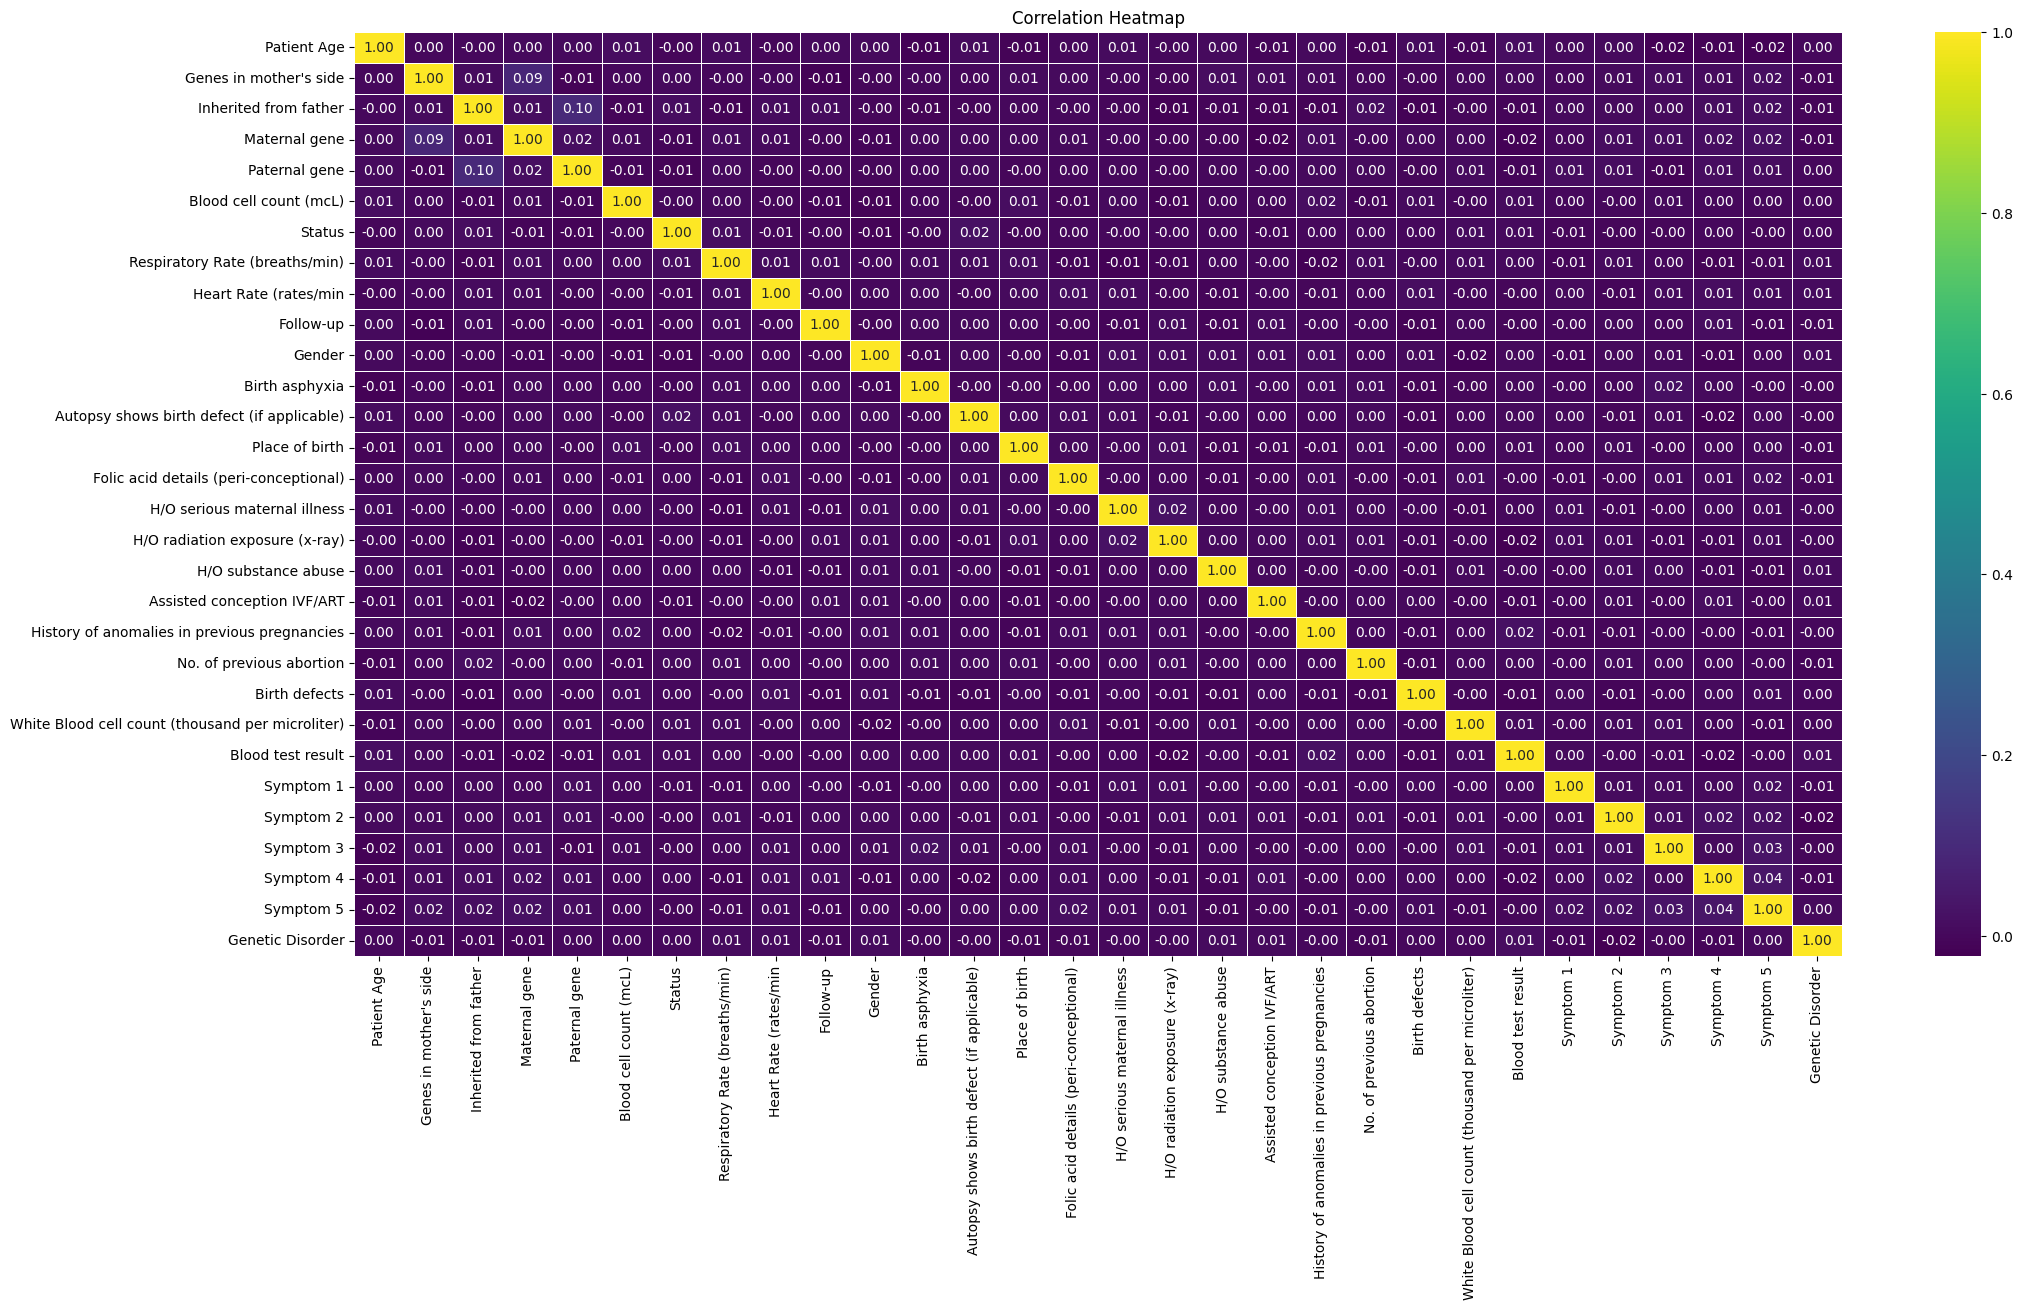

In [510]:
plt.figure(figsize=(24, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Train Test Split**

In [511]:
# Separate features and target
X = train_data.drop("Genetic Disorder", axis=1)
y = train_data["Genetic Disorder"]

In [512]:
cat_columns = X.select_dtypes(include=["object", "category"]).columns.tolist()
float_columns = X.select_dtypes(include=["float64"]).columns.tolist()

In [513]:
# Split data (stratified due to imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [514]:
scaler = StandardScaler()
X_train[float_columns] = scaler.fit_transform(X_train[float_columns])
X_test[float_columns] = scaler.transform(X_test[float_columns])

## **Model Train with Categorical Distribution**

---



### **Model 1: CatBoost**

In [515]:
cat_model = CatBoostClassifier(
    iterations=1000, depth=6, learning_rate=0.05, auto_class_weights="Balanced", random_state=42, verbose=100
)

In [516]:
cat_model.fit(X_train, y_train)

0:	learn: 1.0785427	total: 16.2ms	remaining: 16.1s
100:	learn: 0.7984935	total: 1.23s	remaining: 10.9s
200:	learn: 0.7545962	total: 2.37s	remaining: 9.44s
300:	learn: 0.7180225	total: 3.54s	remaining: 8.21s
400:	learn: 0.6873870	total: 4.93s	remaining: 7.36s
500:	learn: 0.6588350	total: 7.29s	remaining: 7.26s
600:	learn: 0.6328181	total: 8.45s	remaining: 5.61s
700:	learn: 0.6086671	total: 9.6s	remaining: 4.09s
800:	learn: 0.5861265	total: 10.7s	remaining: 2.67s
900:	learn: 0.5663146	total: 11.9s	remaining: 1.3s
999:	learn: 0.5483626	total: 13s	remaining: 0us


In [517]:
y_pred_cat = cat_model.predict(X_test)

In [518]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2041
           1       0.39      0.72      0.50       414
           2       0.52      0.40      0.45      1533

    accuracy                           0.57      3988
   macro avg       0.52      0.59      0.54      3988
weighted avg       0.58      0.57      0.56      3988



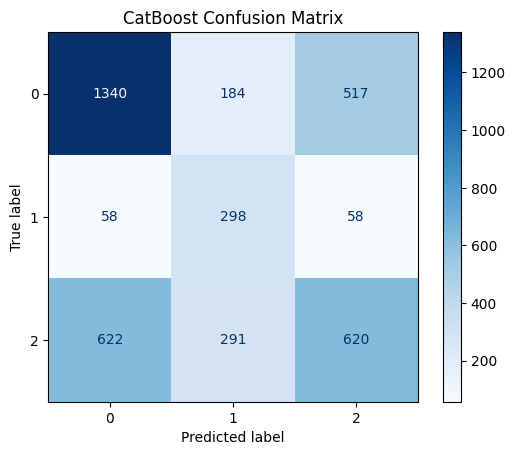

In [519]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.show()

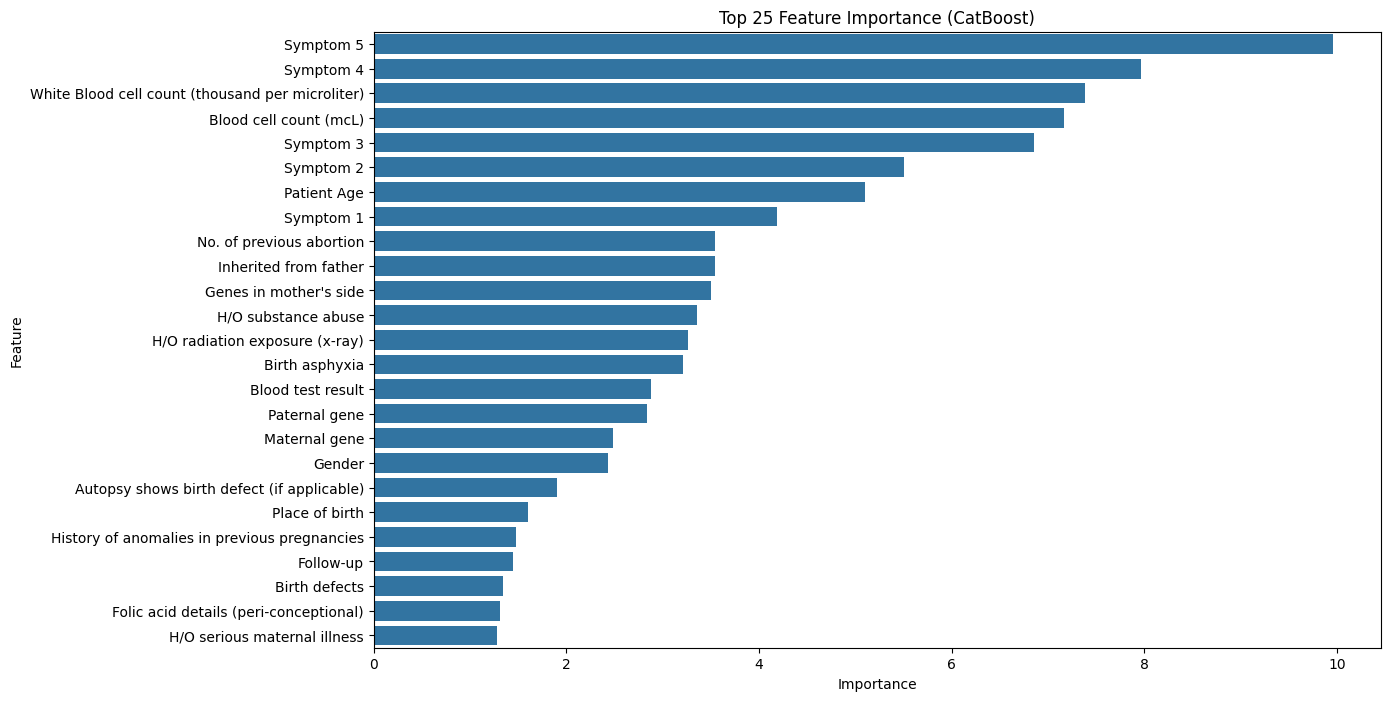

In [520]:
# Feature Importance Plot
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": cat_model.get_feature_importance()})
feature_importance = feature_importance.sort_values("Importance", ascending=False)
plt.figure(figsize=(13, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(25))
plt.title("Top 25 Feature Importance (CatBoost)")
plt.show()

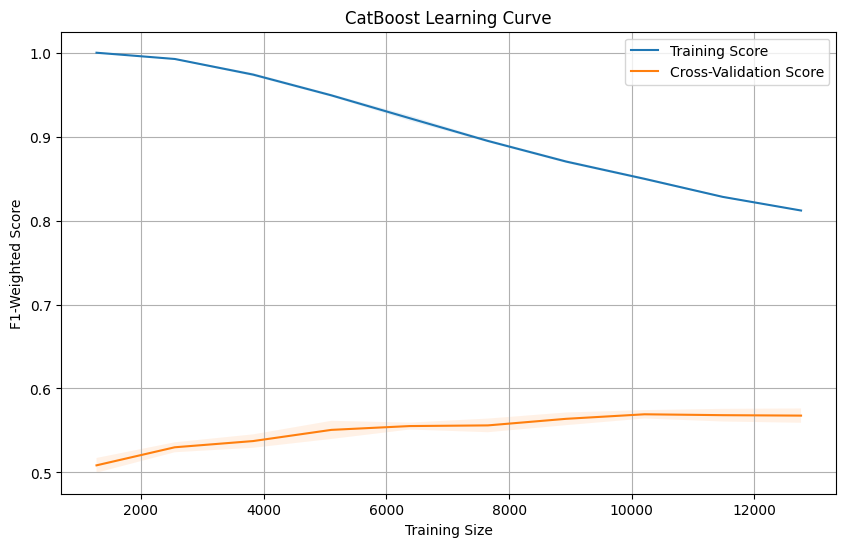

In [521]:
train_sizes, train_scores, test_scores = learning_curve(
    cat_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("CatBoost Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 2: Random Forest**

In [522]:
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42
)

In [523]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [524]:
y_pred_rf = rf_model.predict(X_test)

In [525]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      2041
           1       0.38      0.77      0.51       414
           2       0.56      0.31      0.40      1533

    accuracy                           0.57      3988
   macro avg       0.53      0.60      0.53      3988
weighted avg       0.59      0.57      0.56      3988



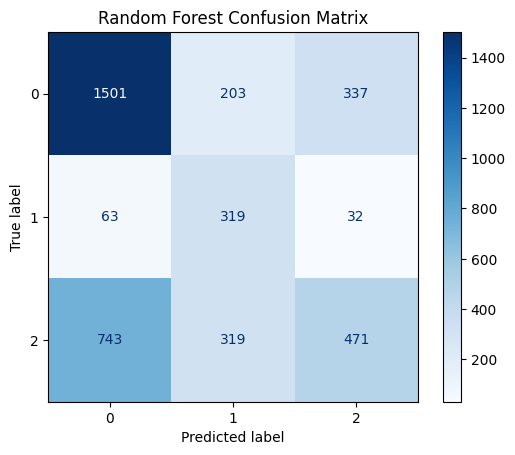

In [526]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

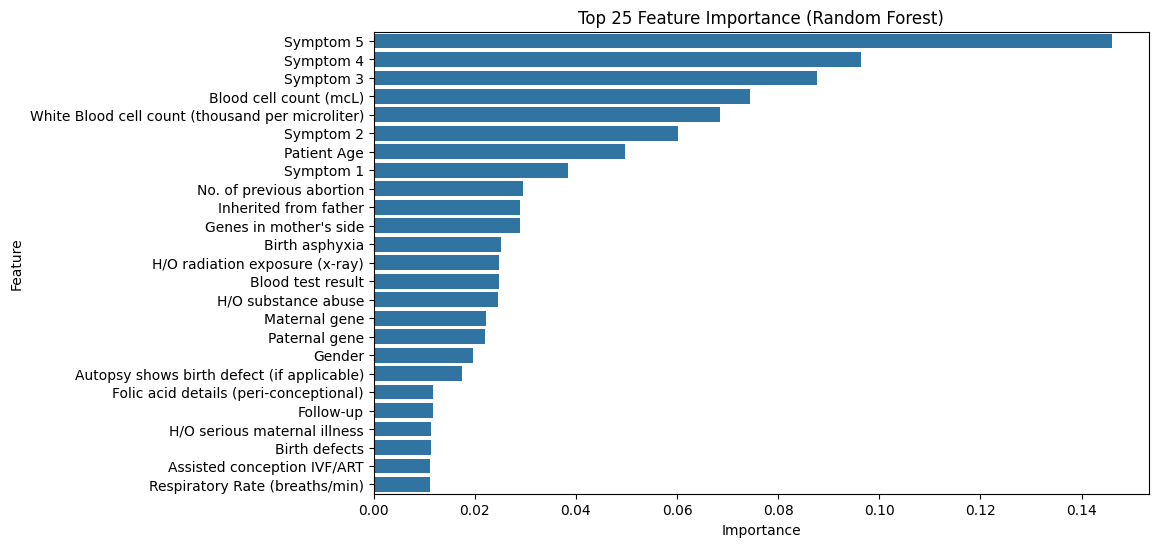

In [527]:
# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values("Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(25))
plt.title("Top 25 Feature Importance (Random Forest)")
plt.show()

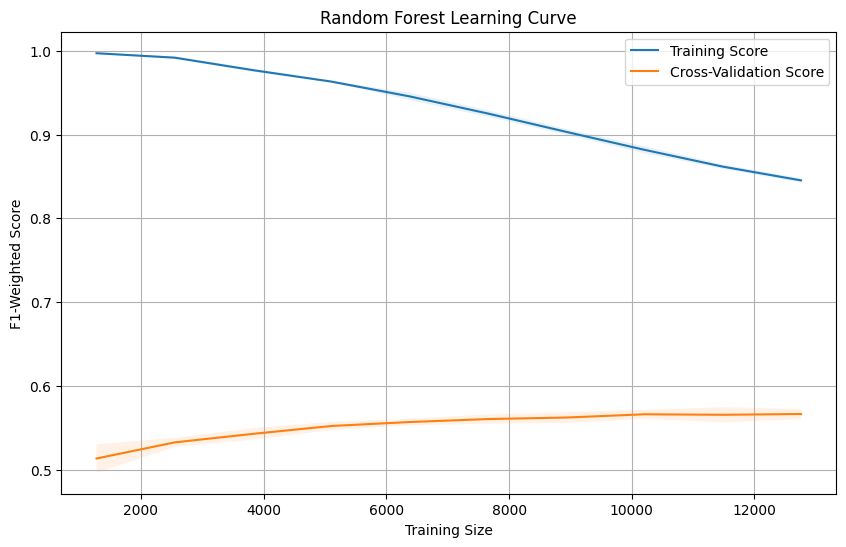

In [528]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("Random Forest Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 3: XGBoost**

In [529]:
# Define class weights
class_weights = {0: 1.0, 1: 10_202/2_071, 2: 10_202/7_664}
sample_weights = [class_weights[label] for label in y_train]

In [530]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.05, subsample=0.8, use_label_encoder=False,
    eval_metric="mlogloss", random_state=42
)

In [531]:
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:56:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [532]:
y_pred_xgb = xgb_model.predict(X_test)

In [533]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2041
           1       0.37      0.77      0.50       414
           2       0.51      0.38      0.43      1533

    accuracy                           0.55      3988
   macro avg       0.51      0.60      0.53      3988
weighted avg       0.57      0.55      0.55      3988



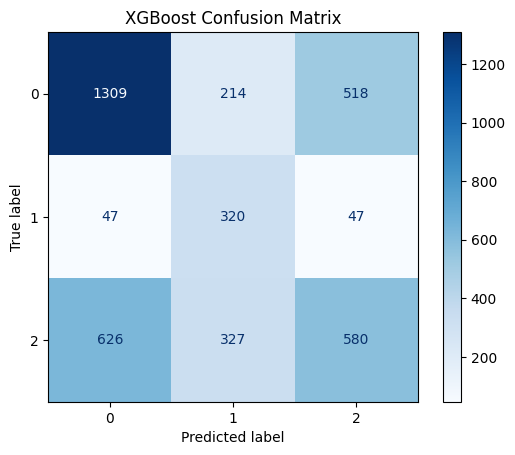

In [534]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

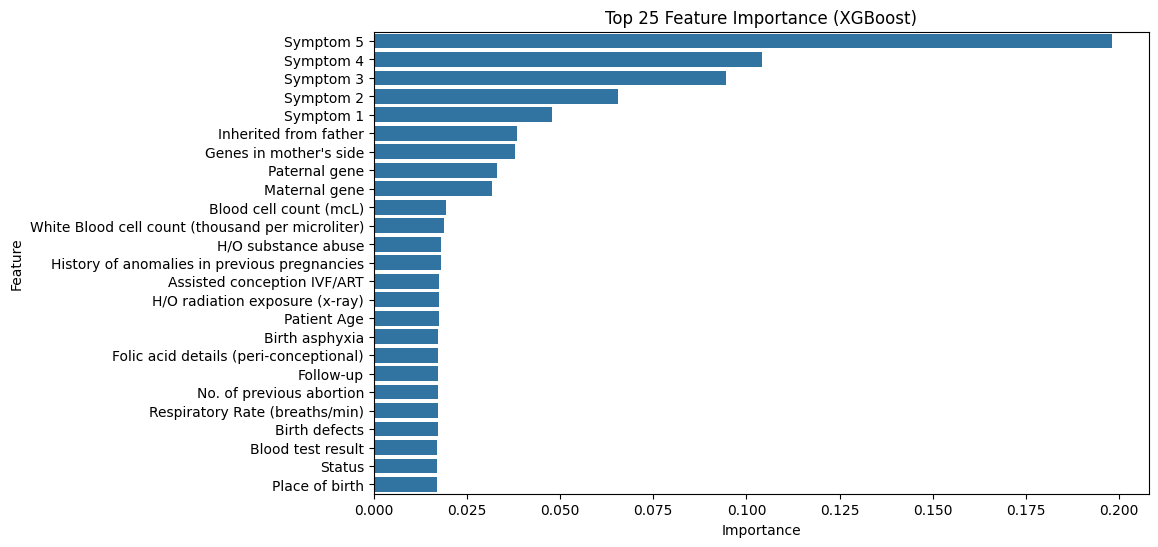

In [535]:
# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values("Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(25))
plt.title("Top 25 Feature Importance (XGBoost)")
plt.show()

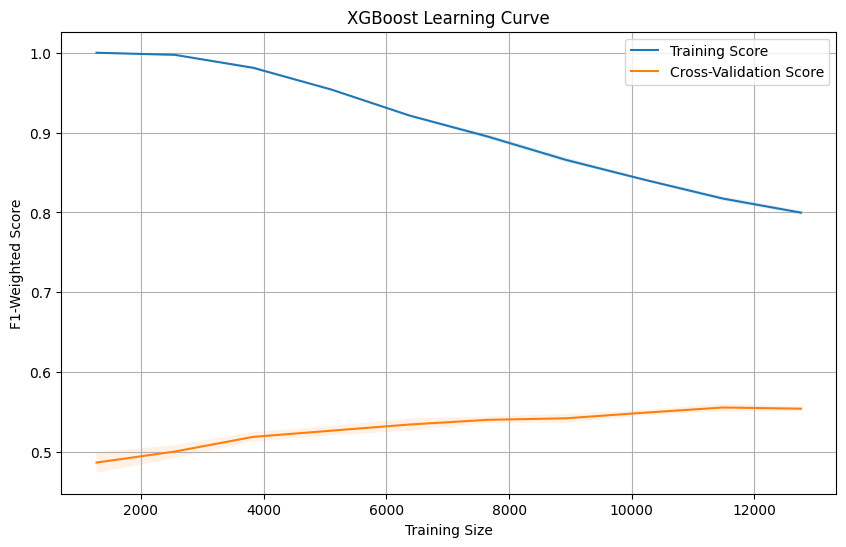

In [536]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("XGBoost Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 4: LightGBM**

In [537]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.05, class_weight="balanced", random_state=42
)

In [538]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 15949, number of used features: 29
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=6,
               n_estimators=200, random_state=42)

In [539]:
y_pred_lgb = lgb_model.predict(X_test)

In [540]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2041
           1       0.36      0.79      0.50       414
           2       0.50      0.36      0.42      1533

    accuracy                           0.54      3988
   macro avg       0.50      0.59      0.52      3988
weighted avg       0.56      0.54      0.54      3988



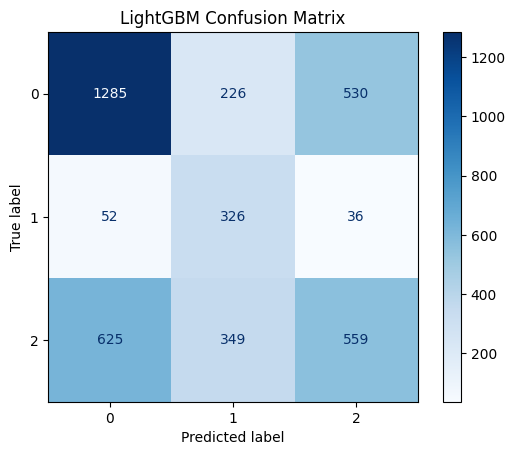

In [541]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.show()

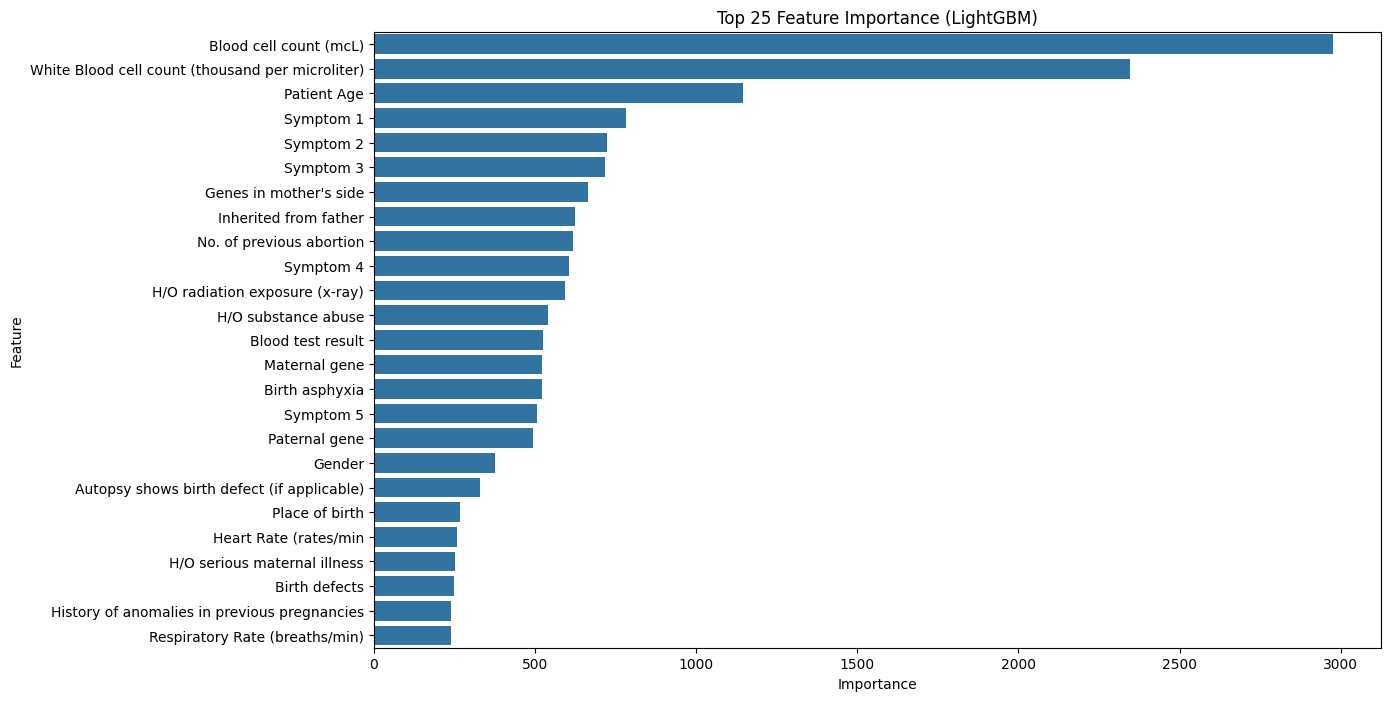

In [542]:
# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": lgb_model.feature_importances_})
feature_importance = feature_importance.sort_values("Importance", ascending=False)
plt.figure(figsize=(13, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(25))
plt.title("Top 25 Feature Importance (LightGBM)")
plt.show()

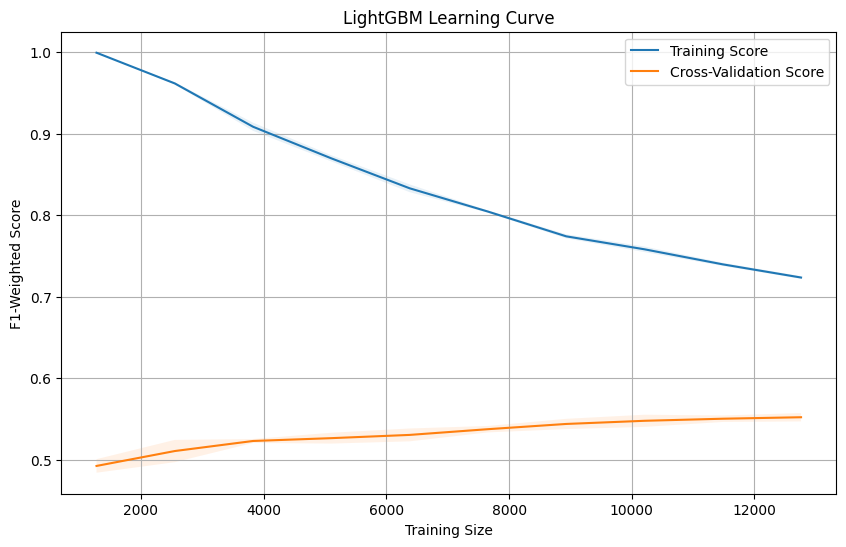

In [543]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    lgb_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("LightGBM Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 5: Logistic Regression**

In [544]:
lr_model = LogisticRegression(
    C=0.1, class_weight="balanced", multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42
)

In [545]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [546]:
y_pred_lr = lr_model.predict(X_test)

In [547]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45      2041
           1       0.32      0.86      0.47       414
           2       0.40      0.46      0.43      1533

    accuracy                           0.45      3988
   macro avg       0.45      0.56      0.45      3988
weighted avg       0.51      0.45      0.45      3988



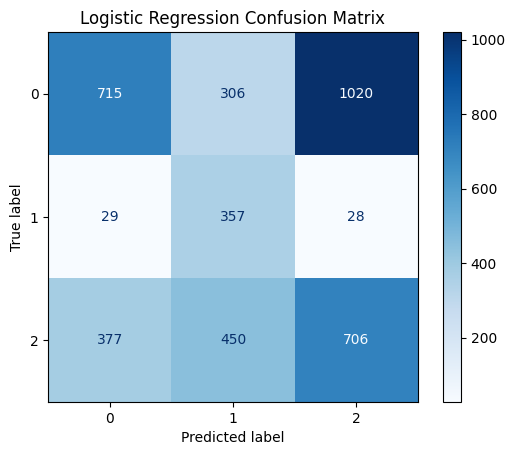

In [548]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

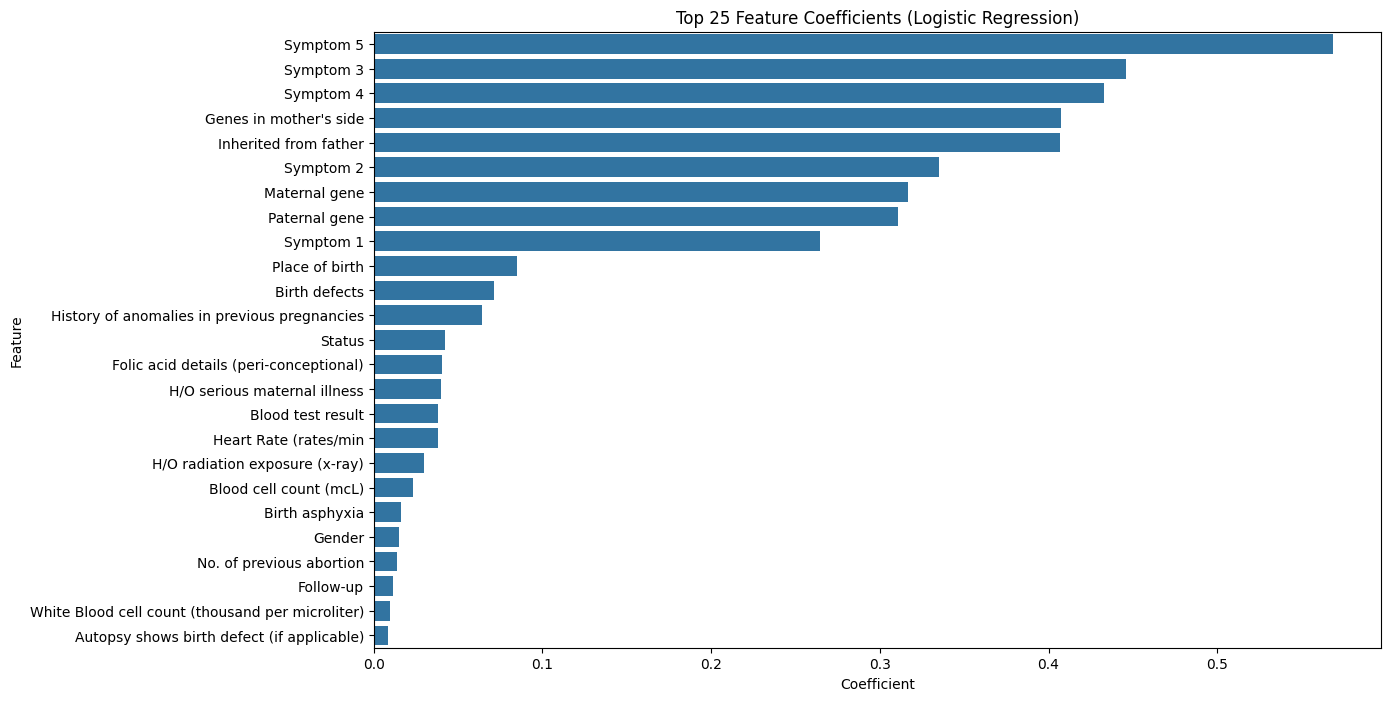

In [549]:
# Coefficients (Feature Importance)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": np.abs(lr_model.coef_[1])})
feature_importance = feature_importance.sort_values("Coefficient", ascending=False)
plt.figure(figsize=(13, 8))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance.head(25))
plt.title("Top 25 Feature Coefficients (Logistic Regression)")
plt.show()

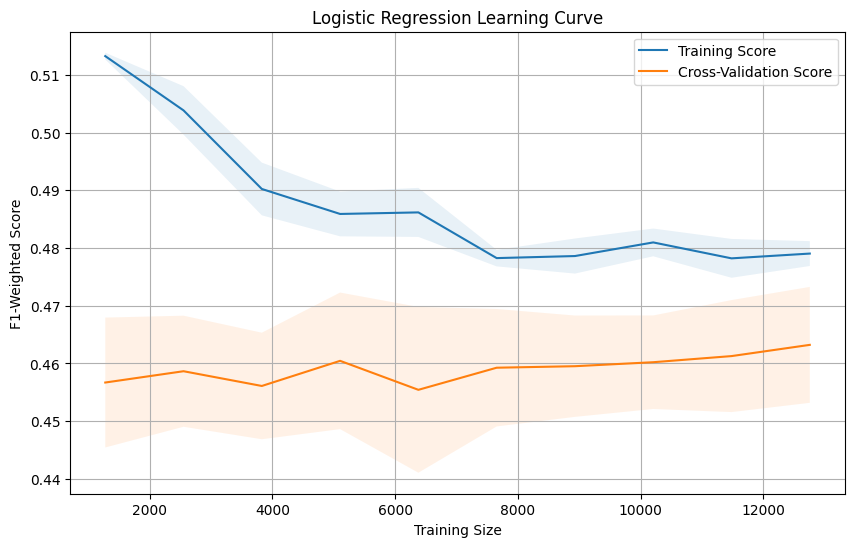

In [550]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("Logistic Regression Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 6: Support Vector Machine (SVM)**

In [551]:
svm_model = SVC(C=1.0, kernel="rbf", class_weight="balanced", random_state=42)

In [552]:
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [553]:
y_pred_svm = svm_model.predict(X_test)

In [554]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      2041
           1       0.36      0.79      0.49       414
           2       0.55      0.31      0.39      1533

    accuracy                           0.56      3988
   macro avg       0.52      0.60      0.52      3988
weighted avg       0.58      0.56      0.55      3988



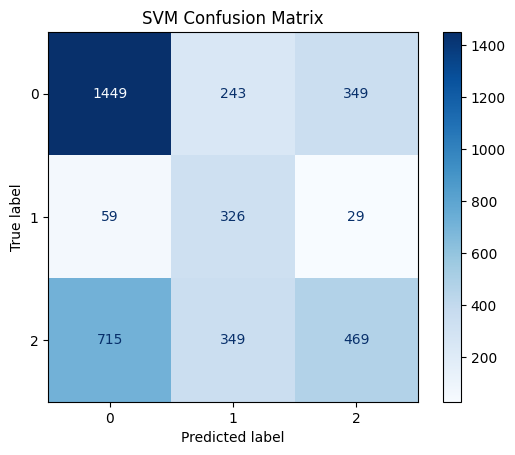

In [555]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


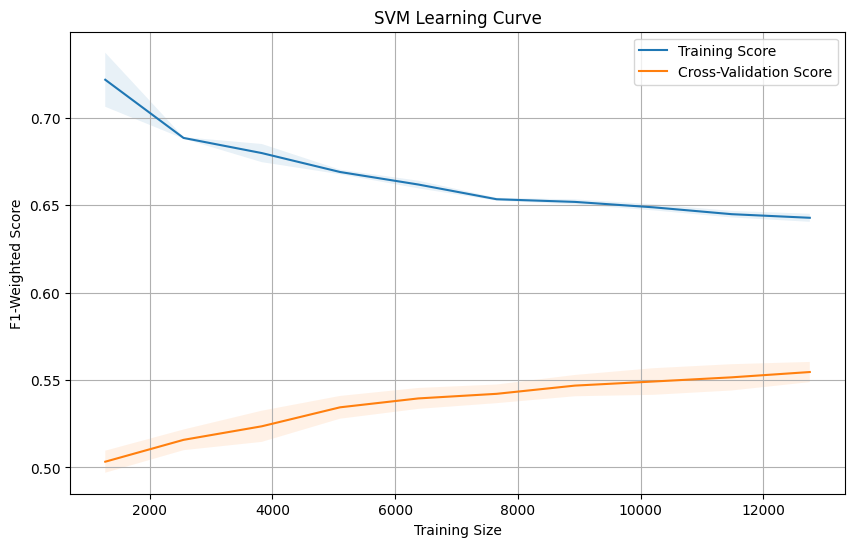

In [556]:
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("SVM Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

### **Model 7: Neural Network (MLP)**

In [557]:
class_weights = {0: 1.0, 1: 10_202/2_071, 2: 10_202/7_664}

In [558]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=500, random_state=42
)

In [559]:
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [560]:
y_pred_mlp = mlp_model.predict(X_test)

In [561]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      2041
           1       0.37      0.38      0.37       414
           2       0.43      0.43      0.43      1533

    accuracy                           0.51      3988
   macro avg       0.46      0.47      0.47      3988
weighted avg       0.51      0.51      0.51      3988



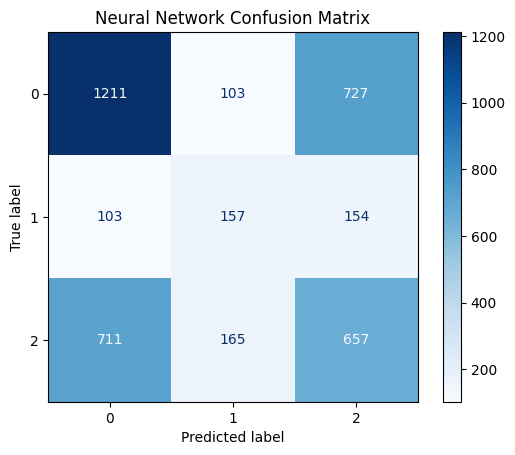

In [562]:
cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

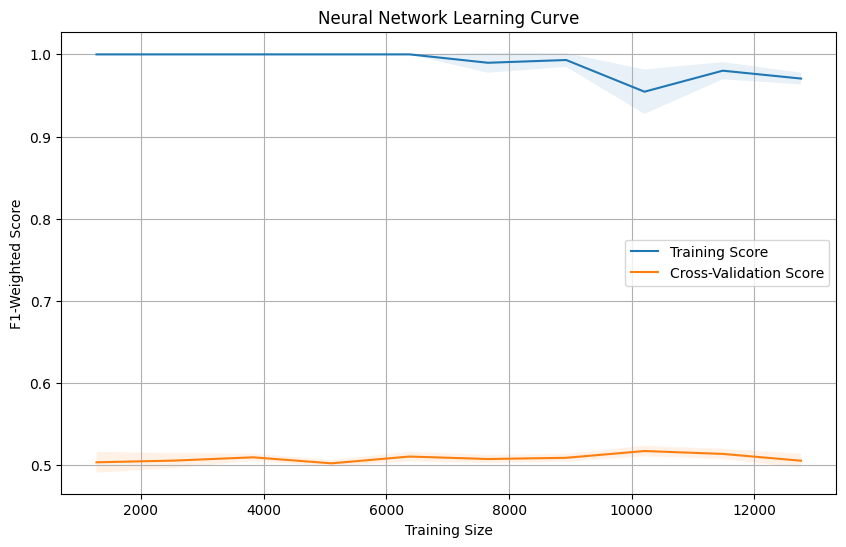

In [563]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp_model, X_train, y_train, cv=5, scoring="f1_weighted", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Size")
plt.ylabel("F1-Weighted Score")
plt.title("Neural Network Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()